In [12]:
#establishing environment
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy
from scipy.stats import pearsonr, ttest_rel, ttest_ind
from numba import jit
from scipy import signal as sig
import matplotlib.patches as mpatches
from scipy.io import loadmat, savemat
from ieeg.auth import Session

In [13]:
### LOADS 
### CAT SPIKE DATA. CAT#_SINGLESPIKES OR CAT#_SPIKES

with open("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/cat_spikes/s_spikes/cat1_singlespikes_set.pkl", "rb") as a:   #Unpickling
    cat1_spikes_set = pickle.load(a)
    
with open("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/CAT/cat_spikes/s_spikes/cat2_singlespikes_set.pkl", "rb") as b:   # Unpickling
    cat2_spikes_set = pickle.load(b)
    
with open("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/CAT/cat_spikes/s_spikes/cat3_singlespikes_set.pkl", "rb") as c:   #Unpickling
    cat3_spikes_set = pickle.load(c)
    
with open("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/CAT/cat_spikes/s_spikes/cat4_singlespikes_set.pkl", "rb") as d:   # Unpickling
    cat4_spikes_set = pickle.load(d)
    
with open("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/CAT/cat_spikes/s_spikes/cat5_singlespikes_set.pkl", "rb") as e:   # Unpickling
    cat5_spikes_set = pickle.load(e)

In [14]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

zero = np.array([])
cat1_spikes_set = np.array([np.asarray(cat1_spikes_set), zero])
cat1_spikes_set = cat1_spikes_set.reshape((2,1))

cat2_spikes_set = np.array([np.asarray(cat2_spikes_set), zero])
cat2_spikes_set = cat2_spikes_set.reshape((2,1))

cat3_spikes_set = np.array([np.asarray(cat3_spikes_set), zero])
cat3_spikes_set = cat3_spikes_set.reshape((2,1))

cat4_spikes_set = np.array([np.asarray(cat4_spikes_set), zero])
cat4_spikes_set = cat4_spikes_set.reshape((2,1))

cat5_spikes_set = np.array([np.asarray(cat5_spikes_set), zero])
cat5_spikes_set = cat5_spikes_set.reshape((2,1))

In [15]:
### LOADS .NPY FILES

cat1_values = np.load("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/cat_values/cat1_values.npy",allow_pickle =True)
cat2_values = np.load("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/cat_values/cat2_values.npy",allow_pickle =True)
cat3_values = np.load("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/cat_values/cat3_values.npy",allow_pickle =True)
cat4_values = np.load("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/cat_values/cat4_values.npy",allow_pickle =True)
cat5_values = np.load("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/cat_values/cat5_values.npy",allow_pickle =True)

In [16]:
#general chLabels
cat1_chLabels = np.array([np.array([np.array((np.linspace(1,48,48)))])])
cat2_chLabels = np.array([np.array([np.array((np.linspace(1,48,48)))])])
cat3_chLabels = np.array([np.array([np.array((np.linspace(1,64,64)))])])
cat4_chLabels = np.array([np.array([np.array((np.linspace(1,64,64)))])])
cat5_chLabels = np.array([np.array([np.array((np.linspace(1,64,64)))])])


In [17]:
print((cat1_values[0][0]))
print(cat1_chLabels)


[[   4.57779     2.441488    0.457779 ...   28.687484   31.434158
    34.333425]
 [ -14.648928  -13.428184  -11.444475 ...   66.683141   63.631281
    60.426828]
 [   1.068151  -18.768939  -32.807495 ...  -85.909859  -82.552813
   -76.601686]
 ...
 [-114.44475  -108.951402 -100.558787 ...  171.667125  184.790123
   195.929412]
 [ -25.177845  -26.245996  -25.788217 ...   76.601686   78.280209
    78.585395]
 [ -14.496335  -17.243009  -19.226718 ... -179.601961 -195.013854
  -213.935386]]
[[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
   18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
   35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48.]]]


In [18]:
#SOZ labels
cat_SOZlabels = pd.read_csv('/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/cat_values/SOZ_cats.csv')


In [19]:
# consolidate the cat data into a file that works
cat1 = {'values': cat1_values, 'seqs': cat1_spikes_set, 'chLabels': cat1_chLabels}
cat2 = {'values': cat2_values, 'seqs': cat2_spikes_set, 'chLabels': cat2_chLabels}
cat3 = {'values': cat3_values, 'seqs': cat3_spikes_set, 'chLabels': cat3_chLabels}
cat4 = {'values': cat4_values, 'seqs': cat4_spikes_set, 'chLabels': cat4_chLabels}
cat5 = {'values': cat5_values, 'seqs': cat5_spikes_set, 'chLabels': cat5_chLabels}


In [20]:
#concatenates each sequence to form a GDF -- removes the sequences in each runtime
def concat_seqs(I,seqs):
    if seqs[I,0].size != 0:
        X = seqs[I,0]
    else:
        X = []
    return X #recreates the GDF from which the sequence was parsed - I can be used to iterate through the whole code

#take the GDF/runtime --> find the max per ch 
#I refers to the index of the specific sequence runtime we want.
def max_per_runtime(seqs,values,I):
    seq_concat = concat_seqs(I,seqs);
    if len(seq_concat) != 0: #skip past the "no spike detected" sequence runtimes
        ch_uniq = np.unique(seq_concat[:,0])
        all_maxvals = []
        for ch in ch_uniq:
            x = np.where(seq_concat[:,0] == ch)[0] #should give you an array with positions where that unique ch was used.
            all_maxes_per_ch = []
            for x in x: #calls on each array in x --> (example. i == [10 34, 70] for when spike channel == 7)
                val = values[I,0][x] - np.mean(values[I,0][x])
                max_val = np.max(np.abs(val)) #FEATURE APPLICATIONS
                #max_val = np.sum(np.absolute(np.ediff1d(val)))
                all_maxes_per_ch.append(max_val)
            all_maxvals.append([ch, all_maxes_per_ch]) 
    else: #the ones with spikes now
        all_maxvals = []
    return all_maxvals #will return all max values in a runtime

#take the singular max calculator from above and make it run for all sequence run_times
def maxes_for_all(seqs,values):
    all_max_vals = []
    for I in range(len(values)):
        runtime_max_vals = max_per_runtime(seqs,values,I)
        all_max_vals.append(runtime_max_vals)
    return all_max_vals

def create_single_matrix(all_max_vals):
    new_mat = []
    for i in range(len(all_max_vals)):
       for k in range(len(all_max_vals[i])):
           a = all_max_vals[i][k]
           new_mat.append(a)
    return new_mat

def create_uniqch(all_max_vals,chLabels):
    new_mat = create_single_matrix(all_max_vals)
    ch_id = range(len(chLabels[0][0]))
    ch_id = (x+1 for x in ch_id)
    total_maxes = []
    total_maxes_fin = []
    for ch in ch_id:
        ch_maxes = []
        for i in range(len(new_mat)):
            if new_mat[i][0] == ch:
                x = new_mat[i][1]
                ch_maxes.append(x)
        total_maxes.append(ch_maxes)
        
    for chX in total_maxes:
        if len(chX) != 0:
            x = np.concatenate(chX)
            total_maxes_fin.append(x)
        else:
            total_maxes_fin.append([])
        
    return total_maxes_fin

def filter_ch(total_maxes):
    #create a cumulative list that tracks the amount of spikes in each channel
    cumul_list = []
    for maxes in total_maxes:
        cumul_list.append(len(maxes))
    #create a histogram, use the edge of first bin as the cutoff
    _,bins,_ = plt.hist(cumul_list,bins=2*146)
    plt.close()
    filt_maxes = []
    for ch in total_maxes:
        if len(ch) <= bins[1]: #uses the cutoff to threshold what we consider artifacts in a channel
            filt_maxes.append([]);
        else:
            filt_maxes.append(ch)
    return filt_maxes #new total_maxes matrix with no deemed low activity channels

#patient SOZ channels loaded via whichPts-1 indexing and then changed to match ChLabels structure
def prep_chlabels(WhichPts,SOZ_chlabels):
    hup203_soz = (SOZ_chlabels.iloc[WhichPts])
    hup203_soz = [x for x in hup203_soz]
    if isfloat(hup203_soz[0]) == False:
        hup203_soz = hup203_soz[0].replace(" ","")
        hup203_soz = hup203_soz.split(',')
        hup203_soz = [x+'-CAR' for x in hup203_soz]
    else:
        hup203_soz = []
    return hup203_soz

def box_plot(data, positions, edge_color, fill_color):
    bp = plt.boxplot(data,positions=positions, patch_artist=True,showfliers=False)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

def box_plot_outliers(data, positions, edge_color, fill_color):
    bp = plt.boxplot(data,positions=positions, patch_artist=True,showfliers=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

#full pipeline in 1 function
def load_split(filename):
    pathway = '/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Patient/Results_v1/split_'
    filetype = '.mat'
    
    split_X = loadmat(pathway+filename+filetype);
    split = split_X
    chLabels = np.transpose(split['chLabels'])
    values = np.transpose(split['values'])
    seqs = np.transpose(split['sequences'])
    leaders = np.transpose(split['leaders'])
    global_coi = np.transpose(split['global_coi'])
    return split, chLabels, values, seqs #global_coi, leaders #you can comment in the global_coi and leaders if need be.
    
def plot_box_per_pt(filename, WhichPts):
    _, _, _, _, nonSOZ_all, SOZ_all, _, _ = maxes_for_plot(filename, WhichPts)

    plt.figure(figsize=(10,7))
    bp1 = box_plot(nonSOZ_all, [1], 'blue', 'lightblue')
    bp2 = box_plot(SOZ_all, [2], 'red', 'pink')
    plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['nonSOZ', 'SOZ'])
    plt.xticks([1, 2], ['nonSOZ', 'SOZ'])
    plt.title('Boxplot of SOZ vs nonSOZ channels spike Amplitudes for '+filename)
    plt.ylabel('Amplitude')

    x1 = 1
    x2 = 2
    y1 = 1500
    y2 = 1600
    y3 = 1900
    plt.plot([x1,x1, x2, x2], [y1, y2, y2, y1], linewidth=1, color='k')
    stat_string = 'statistically significant, p='
    pval_string = stat_string+str(pval)
    plt.text(3/2,1620, s=pval_string, ha='center', va='bottom', color='k')
    plt.ylim([0,1700])
    plt.xlabel('Channel Label')
    plt.show()

    return

def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [21]:
#full pipeline in 1 function
def load_cat(cat_num):
    
    chLabels = cat_num['chLabels']
    values = cat_num['values']
    seqs = cat_num['seqs']
    
    return chLabels, values, seqs 

def calc_maxes_and_stats(cat_num, WhichPts):
    
    chLabels, values, seqs = load_cat(cat_num);
    
    all_max_vals = maxes_for_all(seqs,values)
    total_maxes = create_uniqch(all_max_vals,chLabels)
    filt_maxes = filter_ch(total_maxes)
    
    SOZ_chlabels = pd.read_csv("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/cat_values/SOZ_cats.csv")
    #hup_soz = prep_chlabels(WhichPts,SOZ_chlabels)
    hup_soz = (SOZ_chlabels.iloc[WhichPts])
    hup_soz = [x for x in hup_soz]
    
    if len(hup_soz) != 0:
        SOZ_find = []
        for i in range(len(hup_soz)):
            find = np.where(hup_soz[i] == chLabels[0][0])[0]
            SOZ_find.append(find)

        if len(SOZ_find) != 0:
            SOZ_find = np.concatenate(SOZ_find) #return python index of SOZ matched

            SOZ_find2 = [x+1 for x in SOZ_find]
        else:
            print('NO MATCHES FOR SOZ LABELS ON THE CHLABELS')
            SOZ_find = []
            SOZ_find2 = []
        
    else: 
        hup_soz = hup_soz
        SOZ_find = []
        SOZ_find2 = []
        
    SOZ_maxes = []
    for soz_ch in SOZ_find:
        SOZ_maxes.append(filt_maxes[soz_ch])

    all_ch = range(len(chLabels[0][0])) #all labels

    nonSOZ_idx = [label for label in all_ch if label not in SOZ_find]
    nonSOZ_maxes = []
    for soz_ch in nonSOZ_idx:
        nonSOZ_maxes.append(filt_maxes[soz_ch])

    if len(SOZ_find) != 0:
        nonSOZ_all = np.concatenate(nonSOZ_maxes)
        nonSOZ_all = [x for x in nonSOZ_all if np.isnan(x) == False]
        SOZ_all = np.concatenate(SOZ_maxes)
        SOZ_all = [x for x in SOZ_all if np.isnan(x) == False]
        stats, pval = ttest_ind(nonSOZ_all, SOZ_all, equal_var = False)

    else:
        nonSOZ_all = np.concatenate(nonSOZ_maxes)
        SOZ_all = SOZ_maxes   
        print('Stats could not be calculated, no SOZ recorded')
        stats, pval = [], []

    return pval, SOZ_all, nonSOZ_all





In [22]:
#pipeline for scatter plots for cats
def maxes_for_plot(cat_num, WhichPts):
    chLabels, values, seqs = load_cat(cat_num);
    
    all_max_vals = maxes_for_all(seqs,values)
    total_maxes = create_uniqch(all_max_vals,chLabels)
    filt_maxes = filter_ch(total_maxes)
    
    SOZ_chlabels = pd.read_csv("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/cat_values/SOZ_cats.csv")
    #hup_soz = prep_chlabels(WhichPts,SOZ_chlabels)
    hup_soz = (SOZ_chlabels.iloc[WhichPts])
    hup_soz = [x for x in hup_soz]
    
    if len(hup_soz) != 0:
        SOZ_find = []
        for i in range(len(hup_soz)):
            find = np.where(hup_soz[i] == chLabels[0][0])[0]
            SOZ_find.append(find)

        if len(SOZ_find) != 0:
            SOZ_find = np.concatenate(SOZ_find) #return python index of SOZ matched

            SOZ_find2 = [x+1 for x in SOZ_find]
        else:
            print('NO MATCHES FOR SOZ LABELS ON THE CHLABELS')
            SOZ_find = []
            SOZ_find2 = []
        
    else: 
        hup_soz = hup_soz
        SOZ_find = []
        SOZ_find2 = []
        
    SOZ_maxes = []
    for soz_ch in SOZ_find:
        SOZ_maxes.append(filt_maxes[soz_ch])

    all_ch = range(len(chLabels[0][0])) #all labels

    nonSOZ_idx = [label for label in all_ch if label not in SOZ_find]
    nonSOZ_maxes = []
    for soz_ch in nonSOZ_idx:
        nonSOZ_maxes.append(filt_maxes[soz_ch])

    if len(SOZ_find) != 0:
        nonSOZ_all = np.concatenate(nonSOZ_maxes)
        nonSOZ_all = [x for x in nonSOZ_all if np.isnan(x) == False]
        SOZ_all = np.concatenate(SOZ_maxes)
        SOZ_all = [x for x in SOZ_all if np.isnan(x) == False]
        stats, pval = ttest_ind(nonSOZ_all, SOZ_all, equal_var = False)

    else:
        nonSOZ_all = np.concatenate(nonSOZ_maxes)
        SOZ_all = SOZ_maxes   
        print('Stats could not be calculated, no SOZ recorded')
        stats, pval = [], []
        
    return filt_maxes, total_maxes, SOZ_find2, SOZ_maxes, nonSOZ_all, SOZ_all, pval, chLabels

def plot_scatter(cat_num, WhichPts):
    
    filt_maxes, total_maxes, SOZ_find2, SOZ_maxes, nonSOZ_all, SOZ_all, pval,chLabels = maxes_for_plot(cat_num, WhichPts)
    
    #label_idx = np.arange(1,147)
    label_idx = range(len(chLabels[0][0]))
    label_idx = [x+1 for x in label_idx]
    plt.figure(figsize=(20,10))
    for x, y in zip(label_idx,filt_maxes):
        plt.scatter([x]*len(y), y, color='b',marker=".", s=1)

    for xe, ye in zip(SOZ_find2, SOZ_maxes):
        plt.scatter([xe] * len(ye), ye,color='r',marker=".", s=1)

    plt.title('Max values for each Channel in Cat '+ str(i+1))
    SOZ_label = mpatches.Patch(color='r', label='SOZ') #imported matplotlib.patches -> manually creates legend since auto-detection of the legend via plt.legend() didn't work
    nonSOZ_label = mpatches.Patch(color='b', label='non-SOZ')
    plt.legend(handles=[SOZ_label,nonSOZ_label])
    plt.ylabel('Amplitude')
    plt.xlabel('Channel')
    plt.show()
    return 

    
def plot_box_per_pt(cat_num, WhichPts):
    filt_maxes, total_maxes, SOZ_find2, SOZ_maxes, nonSOZ_all, SOZ_all, pval,chLabels = maxes_for_plot(cat_num, WhichPts)

    plt.figure(figsize=(10,7))
    bp1 = box_plot(nonSOZ_all, [1], 'blue', 'lightblue')
    bp2 = box_plot(SOZ_all, [2], 'red', 'pink')
    plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['nonSOZ', 'SOZ'])
    plt.xticks([1, 2], ['nonSOZ', 'SOZ'])
    plt.title('Boxplot of SOZ vs nonSOZ channels spike Amplitudes Cat '+ str(i+1))
    plt.ylabel('Amplitude')

    x1 = 1.24
    x2 = 1.79
    y1 = 2500
    y2 = 2600
    y3 = 2900
    plt.plot([x1,x1, x2, x2], [y1, y2, y2, y1], linewidth=1, color='k')
    stat_string = 'p='
    pval_string = stat_string+str(pval)
    plt.text(3/2,2630, s=pval_string, ha='center', va='bottom', color='k')
    plt.xlabel('Channel Label')
    plt.show()

    return

In [23]:
#MEAN MAXES
cats = [cat1,cat2,cat3,cat4,cat5] #list of dictionaries
whichPts = range(5)

cat_pvals = []
cat_SOZ_all = []
cat_nonSOZ_all =[]

for i in range(len(cats)):
    pval, SOZ_all, nonSOZ_all = calc_maxes_and_stats(cats[i], whichPts[i])
    cat_SOZ_all.append(SOZ_all)
    cat_nonSOZ_all.append(nonSOZ_all)
    cat_pvals.append(pval)
    

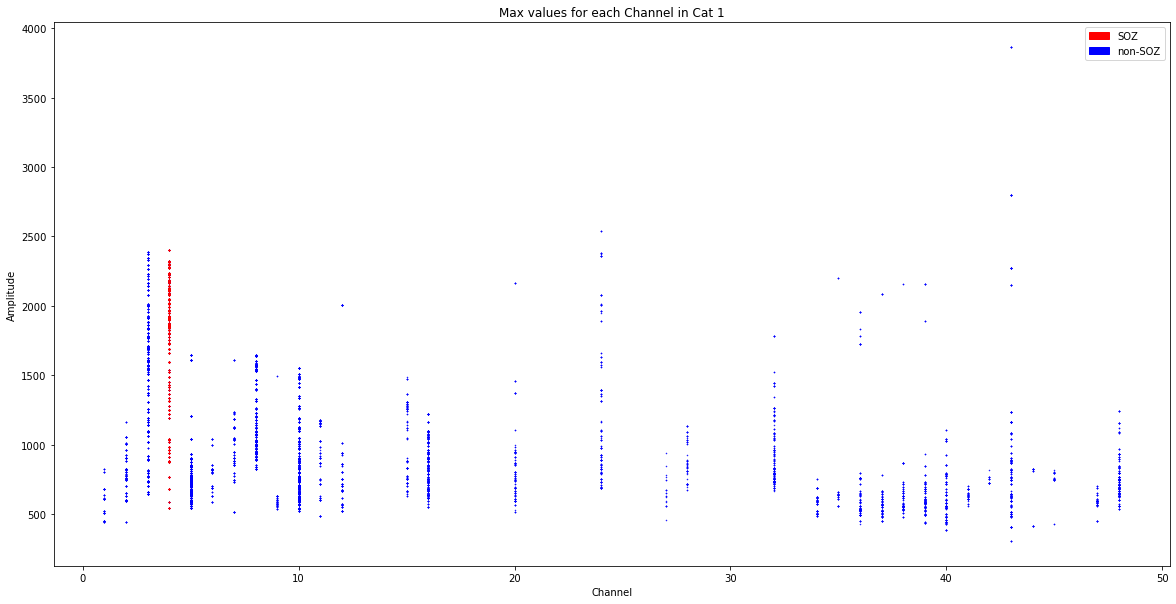

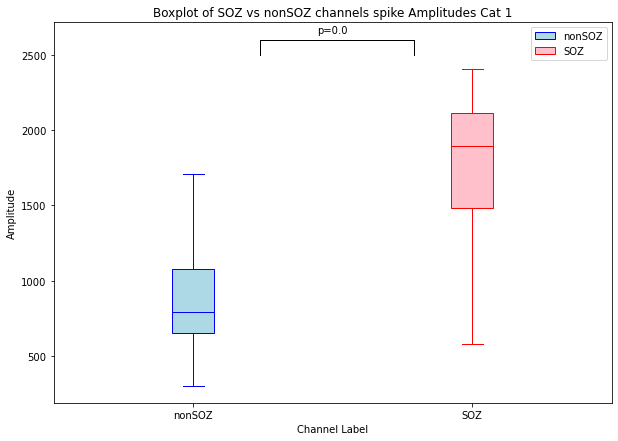

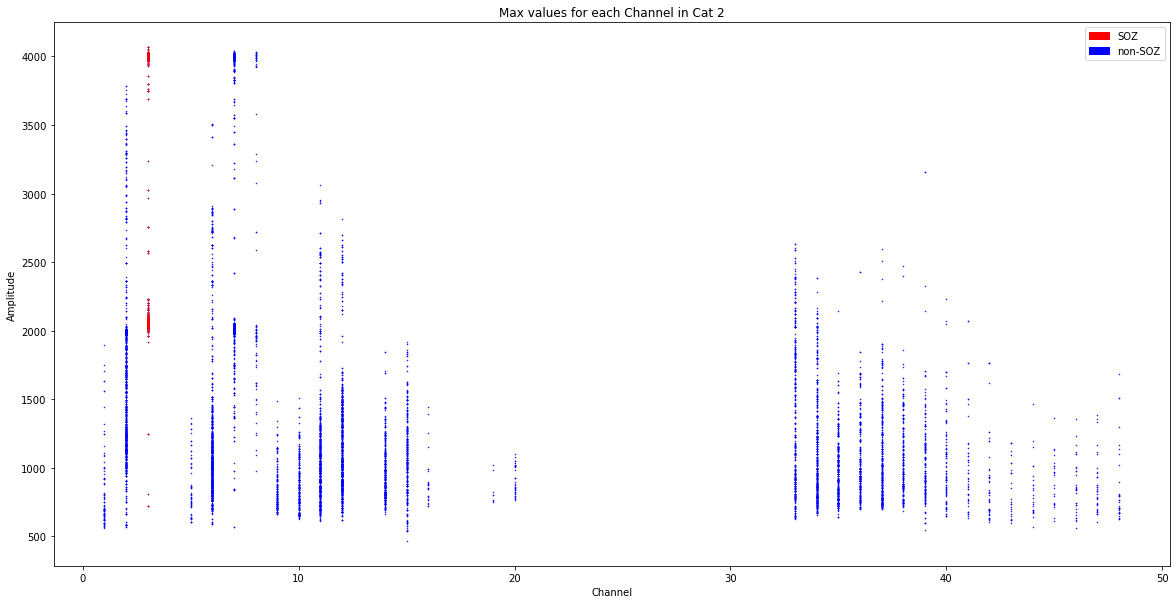

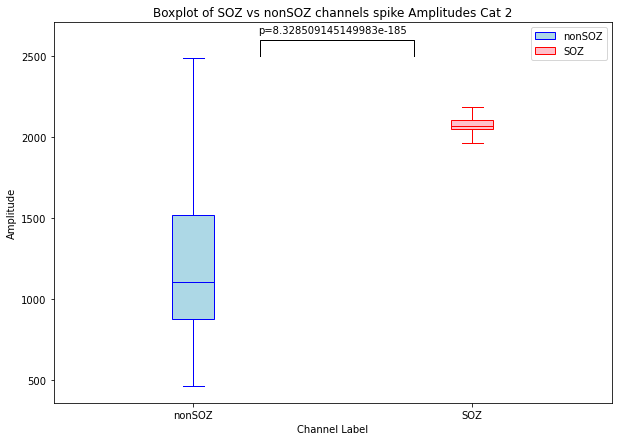

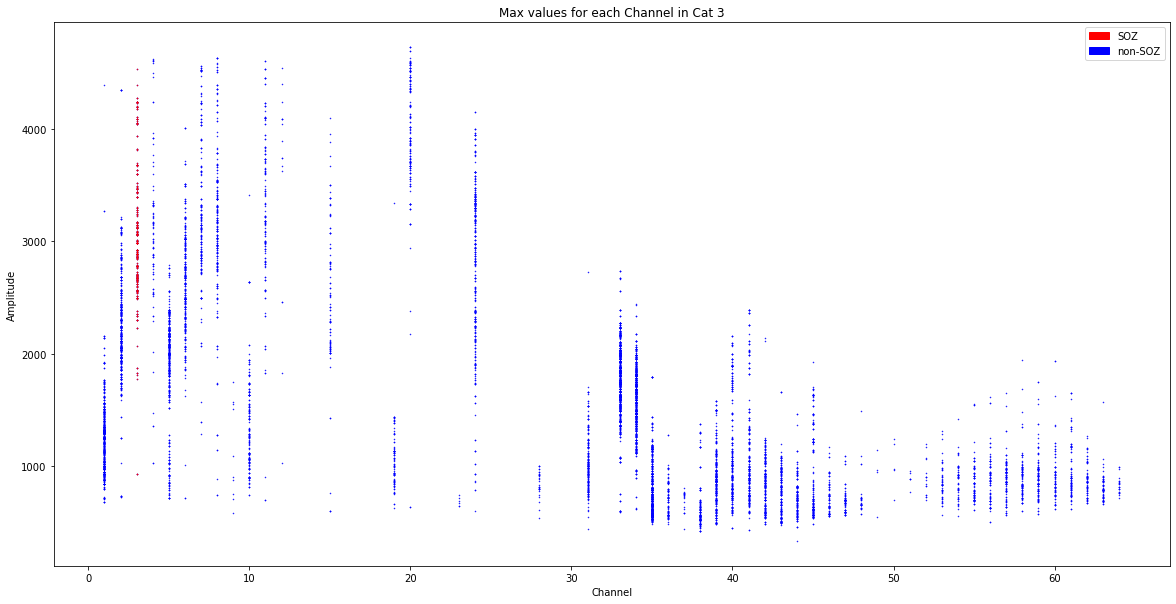

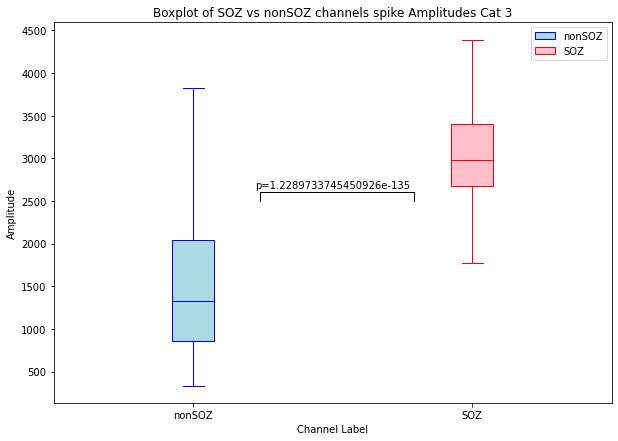

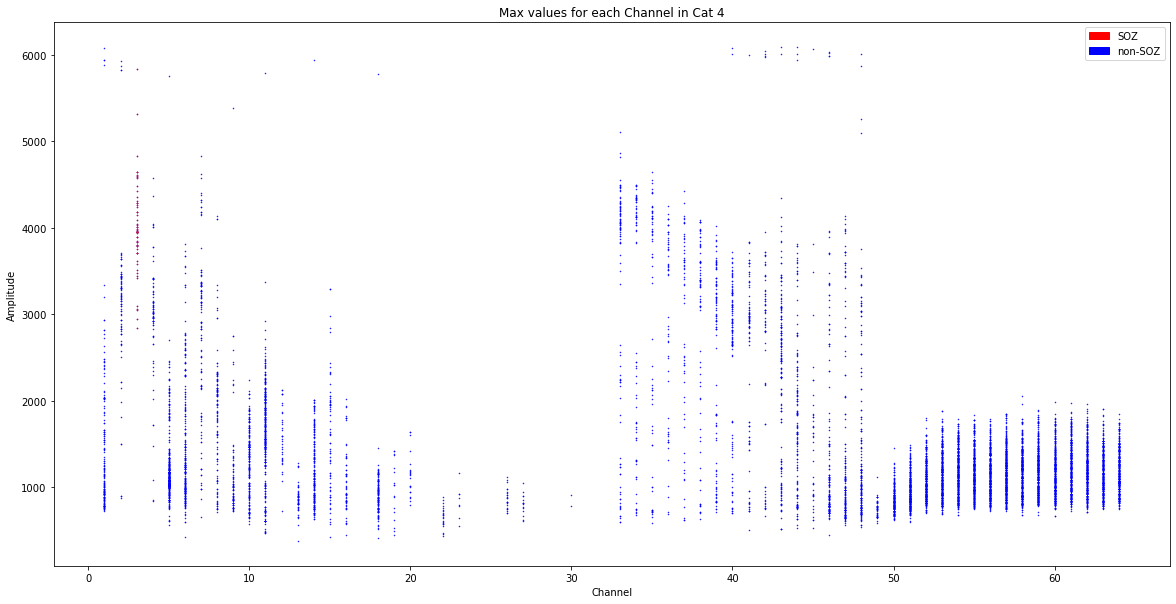

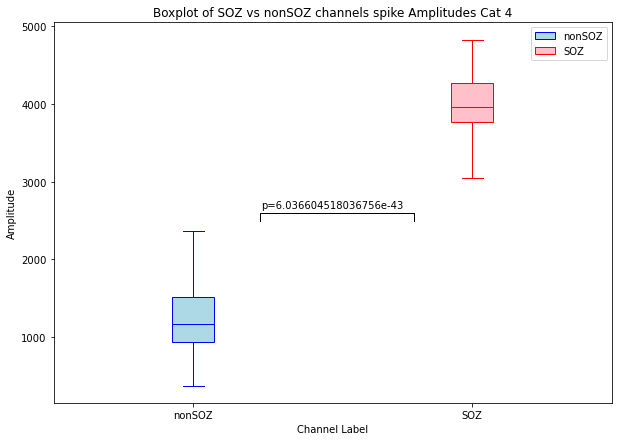

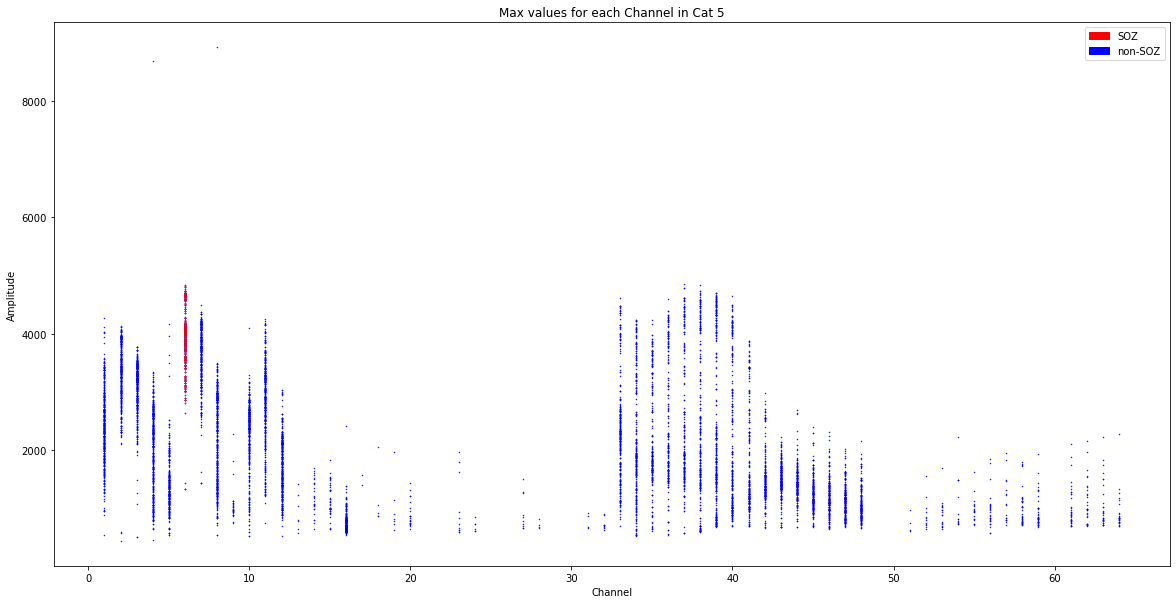

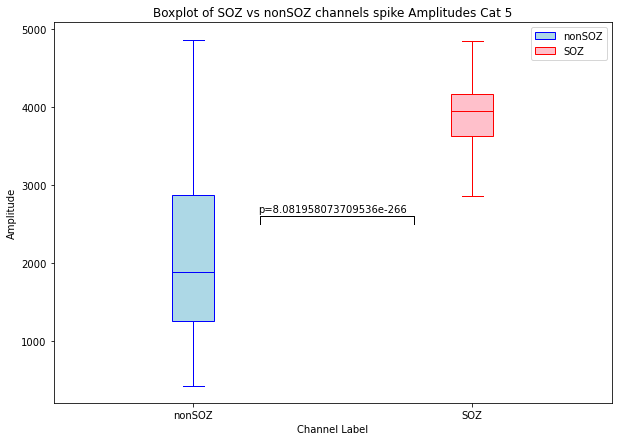

In [24]:
for i in range(len(cats)):
    plot_scatter(cats[i],whichPts[i])
    plot_box_per_pt(cats[i],whichPts[i])

In [25]:
print(np.shape(cat_nonSOZ_all[0]))


(8775,)


In [26]:
SOZ_all_mean = [np.mean(x) for x in cat_SOZ_all]
nonSOZ_all_mean = [np.mean(x) for x in cat_nonSOZ_all]


In [27]:
print(SOZ_all_mean)

[1760.4786001674981, 2410.5200396613504, 3057.030652040646, 3998.3476882288846, 3922.4650388617943]


In [28]:
ttest_rel(SOZ_all_mean,nonSOZ_all_mean)


Ttest_relResult(statistic=5.103152754876837, pvalue=0.006967286674983937)

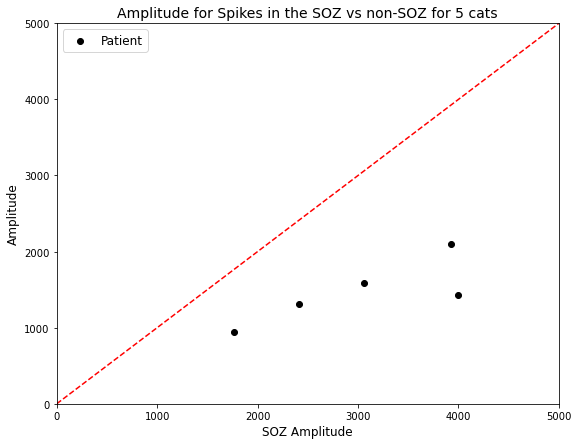

In [29]:
plt.figure(figsize=[9,7])
plt.title('Amplitude for Spikes in the SOZ vs non-SOZ for 5 cats',fontsize=14)
plt.scatter(SOZ_all_mean,nonSOZ_all_mean,color='k',marker='o',label='Patient')
plt.xlabel('SOZ Amplitude',fontsize=12)
plt.ylabel('nonSOZ Amplitude',fontsize=12)
y = np.arange(0,5000,1)
x = np.arange(0,5000,1)
plt.plot(x,y,linestyle='dashed',color='r')
plt.ylim([0,5000])
plt.xlim([0,5000])
plt.legend(fontsize=12)
plt.ylabel('Amplitude')
#plt.savefig('fig_2_pts.jpeg',dpi=100)
plt.show()

---

In [30]:
### CHANGE to LineLength
# line length
def LL(x):
    return np.sum(np.absolute(np.ediff1d(x)))

def max_per_runtime(seqs,values,I):
    seq_concat = concat_seqs(I,seqs);
    if len(seq_concat) != 0: #skip past the "no spike detected" sequence runtimes
        ch_uniq = np.unique(seq_concat[:,0])
        all_maxvals = []
        for ch in ch_uniq:
            x = np.where(seq_concat[:,0] == ch)[0] #should give you an array with positions where that unique ch was used.
            all_maxes_per_ch = []
            for x in x: #calls on each array in x --> (example. i == [10 34, 70] for when spike channel == 7)
                val = values[I,0][x] - np.mean(values[I,0][x])
                max_val = LL(val) #FEATURE APPLICATIONS
                #max_val = np.sum(np.absolute(np.ediff1d(val)))
                all_maxes_per_ch.append(max_val)
            all_maxvals.append([ch, all_maxes_per_ch]) 
    else: #the ones with spikes now
        all_maxvals = []
    return all_maxvals #will return all max values in a runtime

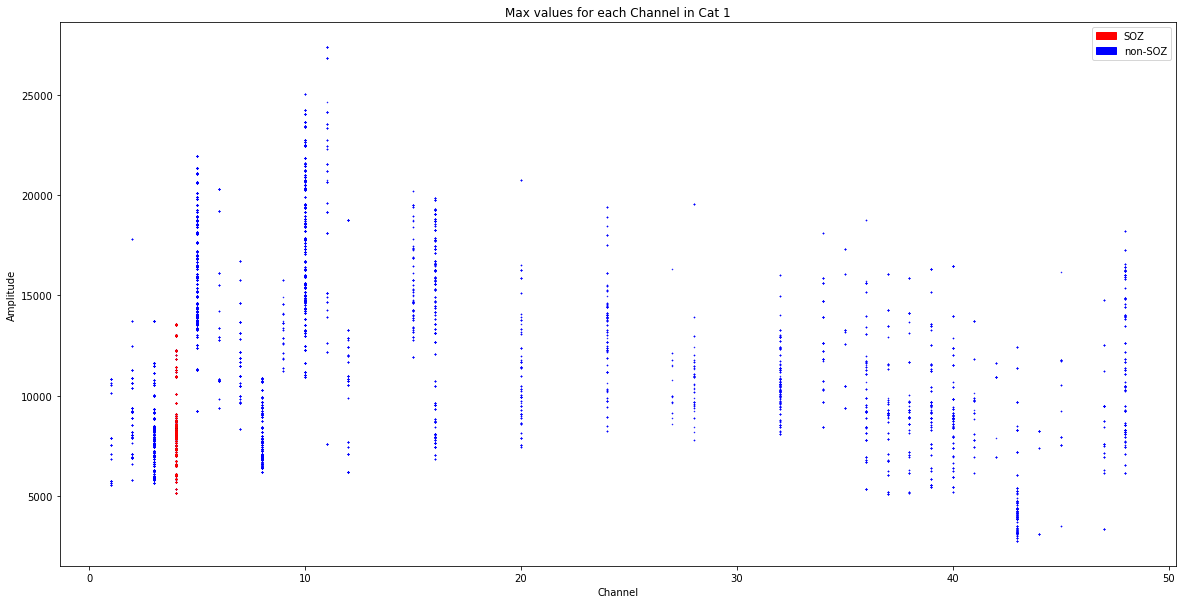

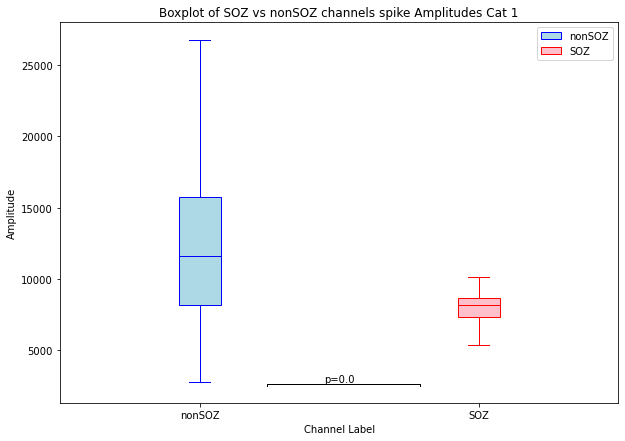

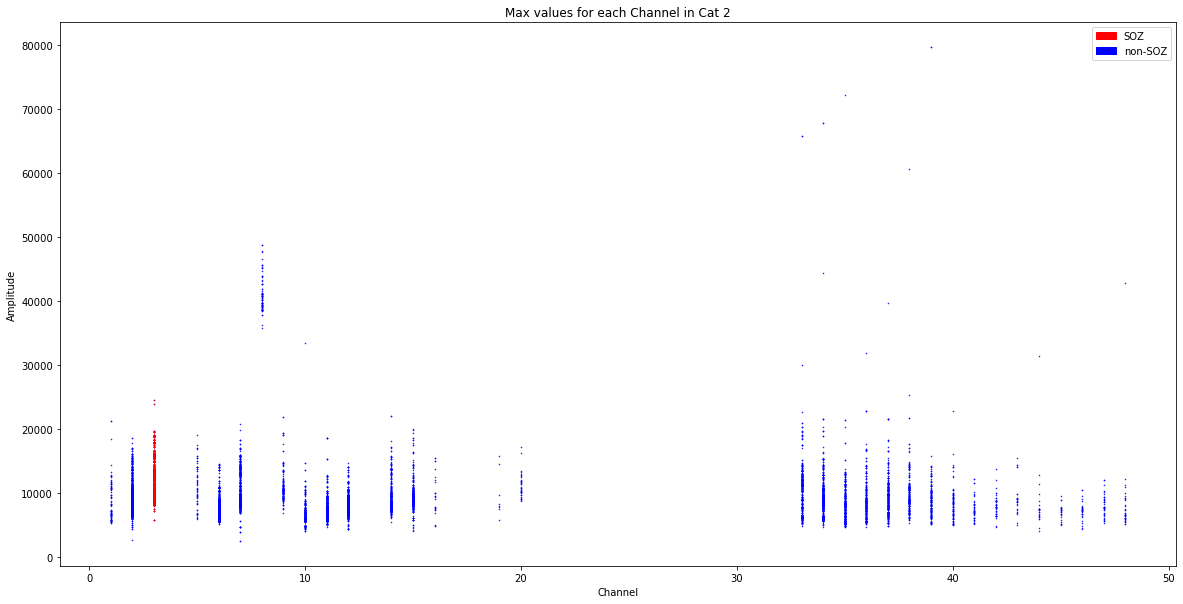

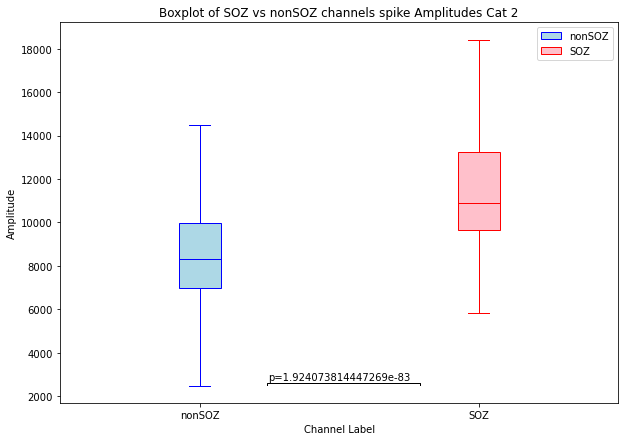

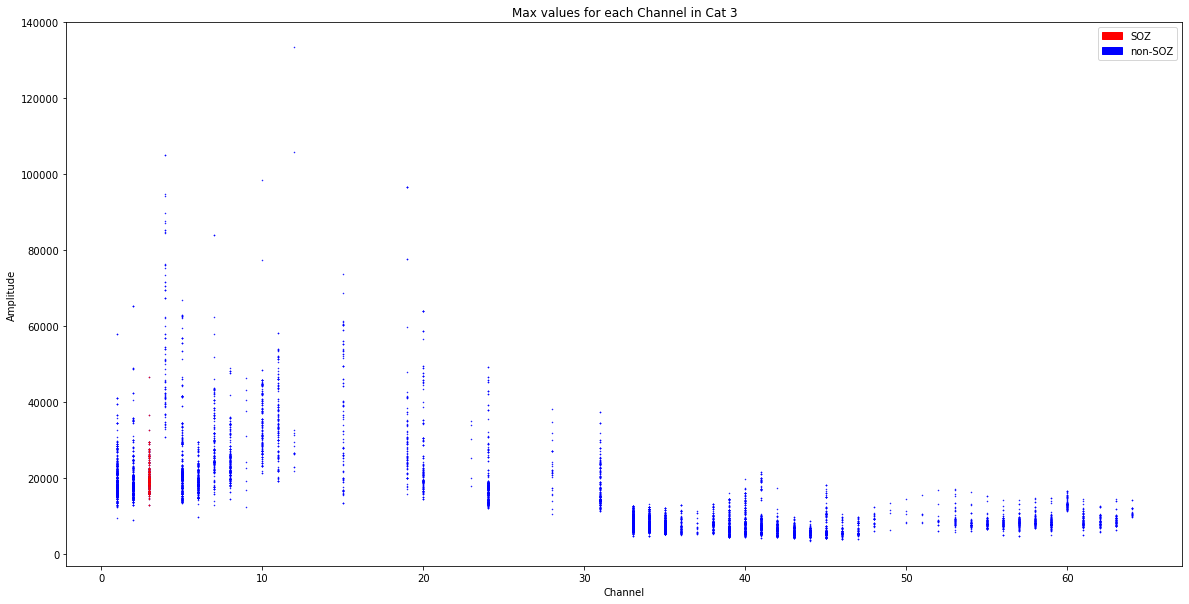

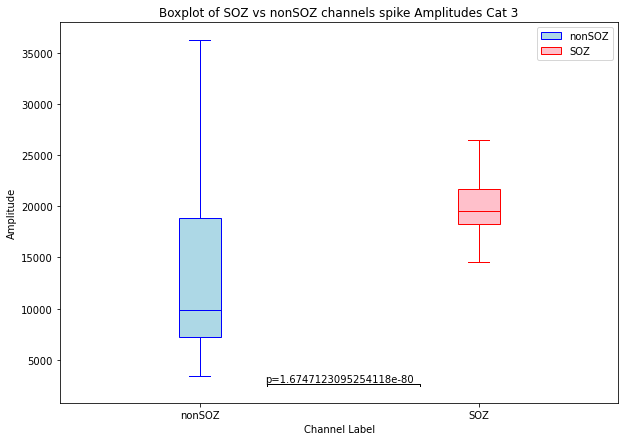

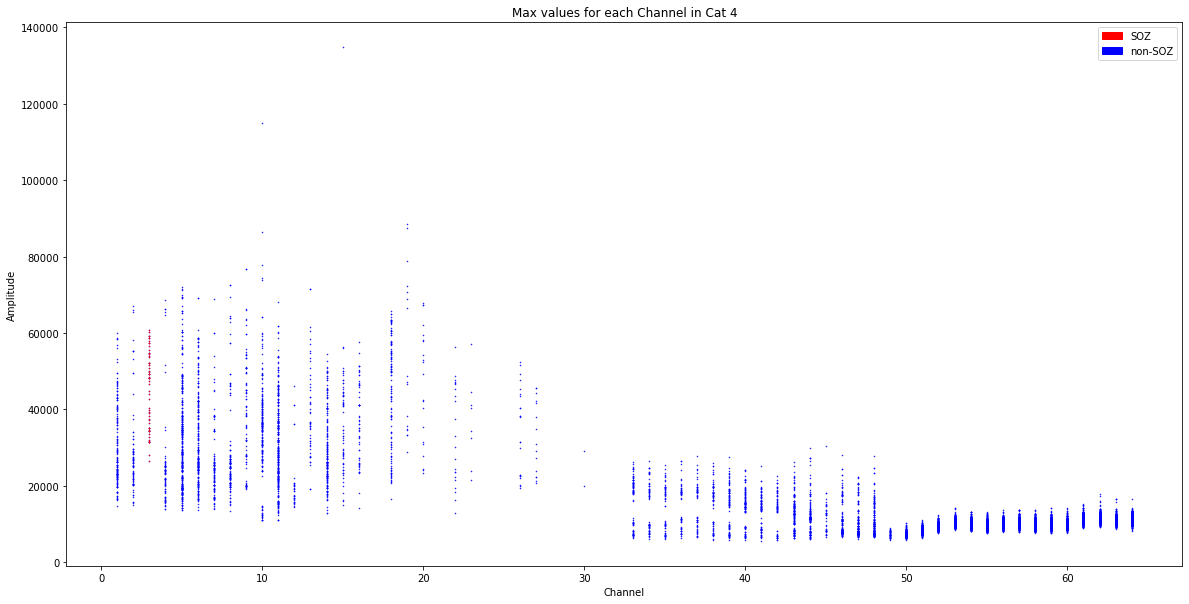

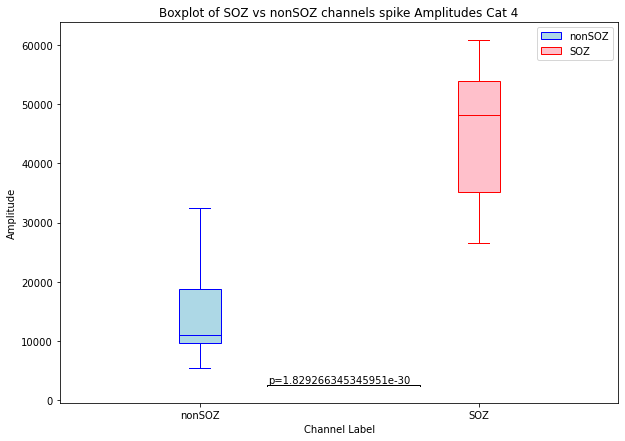

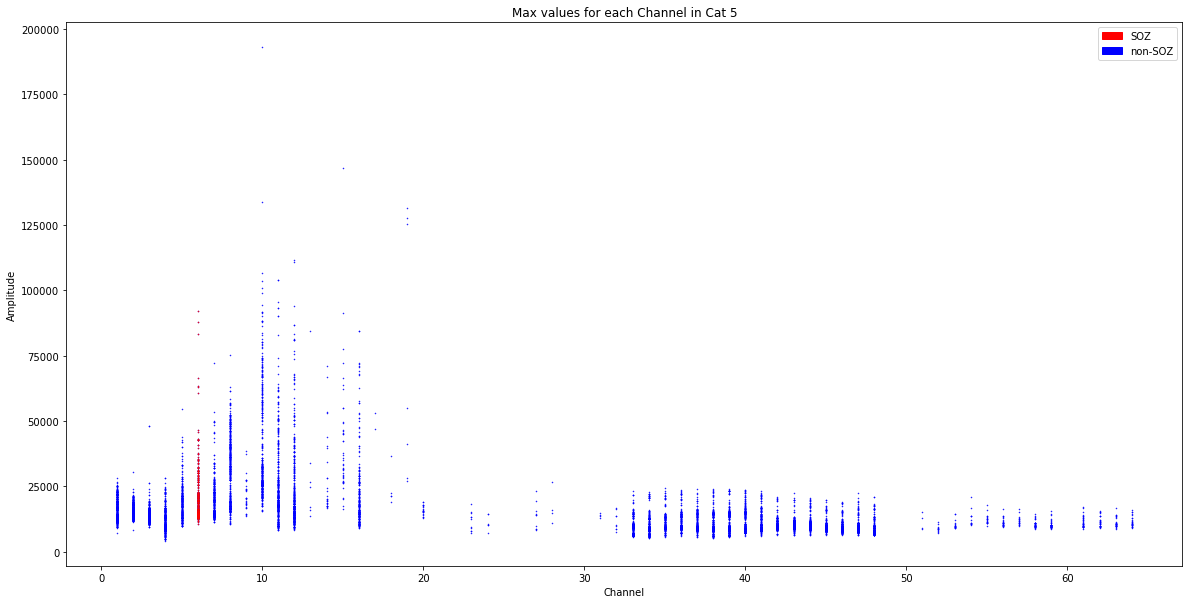

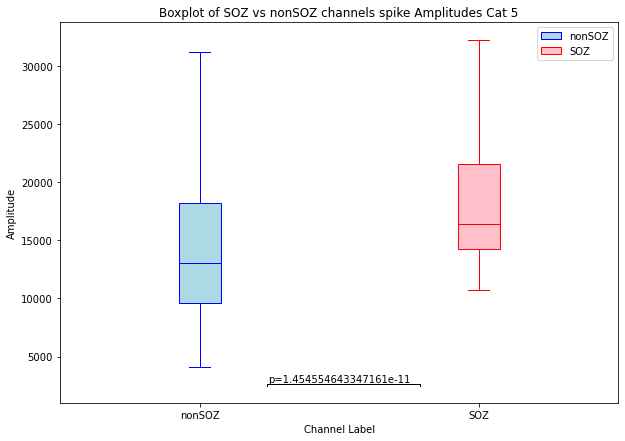

In [31]:
for i in range(len(cats)):
    plot_scatter(cats[i],whichPts[i])
    plot_box_per_pt(cats[i],whichPts[i])

In [32]:
#MEAN LL
cats = [cat1,cat2,cat3,cat4,cat5] #list of dictionaries
whichPts = range(5)

cat_pvals = []
cat_SOZ_all = []
cat_nonSOZ_all =[]

for i in range(len(cats)):
    pval, SOZ_all, nonSOZ_all = calc_maxes_and_stats(cats[i], whichPts[i])
    cat_SOZ_all.append(SOZ_all)
    cat_nonSOZ_all.append(nonSOZ_all)
    cat_pvals.append(pval)
    
SOZ_all_mean = [np.mean(x) for x in cat_SOZ_all]
nonSOZ_all_mean = [np.mean(x) for x in cat_nonSOZ_all]

ttest_rel(SOZ_all_mean,nonSOZ_all_mean)
print(ttest_rel(SOZ_all_mean,nonSOZ_all_mean))

Ttest_relResult(statistic=1.3094489386199308, pvalue=0.2605310136444314)


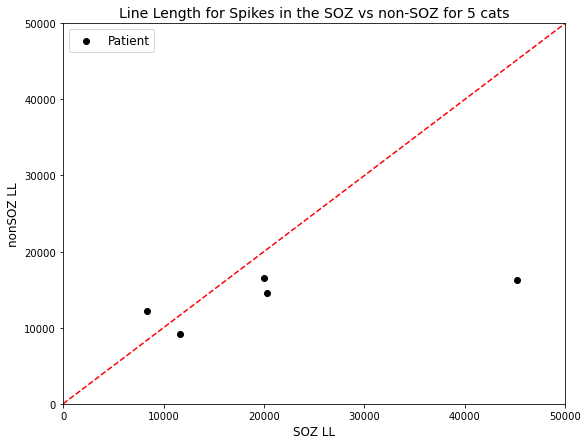

In [33]:
plt.figure(figsize=[9,7])
plt.title('Line Length for Spikes in the SOZ vs non-SOZ for 5 cats',fontsize=14)
plt.scatter(SOZ_all_mean,nonSOZ_all_mean,color='k',marker='o',label='Patient')
plt.xlabel('SOZ LL',fontsize=12)
plt.ylabel('nonSOZ LL',fontsize=12)
y = np.arange(0,50000,1)
x = np.arange(0,50000,1)
plt.ylim([0,50000])
plt.xlim([0,50000])
plt.plot(x,y,linestyle='dashed',color='r')
plt.legend(fontsize=12)
#plt.savefig('fig_2_pts.jpeg',dpi=100)
plt.show()

---

In [34]:
#BETA Bandpower
def bandpower(x, fs, fmin, fmax):
    f, Pxx = sig.periodogram(x, fs=fs)
    ind_min = np.argmax(f > fmin) - 1
    ind_max = np.argmax(f > fmax) - 1
    return np.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])

def max_per_runtime(seqs,values,I):
    seq_concat = concat_seqs(I,seqs);
    if len(seq_concat) != 0: #skip past the "no spike detected" sequence runtimes
        ch_uniq = np.unique(seq_concat[:,0])
        all_maxvals = []
        for ch in ch_uniq:
            x = np.where(seq_concat[:,0] == ch)[0] #should give you an array with positions where that unique ch was used.
            all_maxes_per_ch = []
            for x in x: #calls on each array in x --> (example. i == [10 34, 70] for when spike channel == 7)
                val = values[I,0][x] - np.mean(values[I,0][x])
                max_val = bandpower(val, fs=len(val)-1, fmin = 12, fmax = 30) #FEATURE APPLICATIONS #AMPLITUDE
                #max_val = np.sum(np.absolute(np.ediff1d(val)))
                all_maxes_per_ch.append(max_val)
            all_maxvals.append([ch, all_maxes_per_ch]) 
    else: #the ones with spikes now
        all_maxvals = []
    return all_maxvals #will return all max values in a runtime

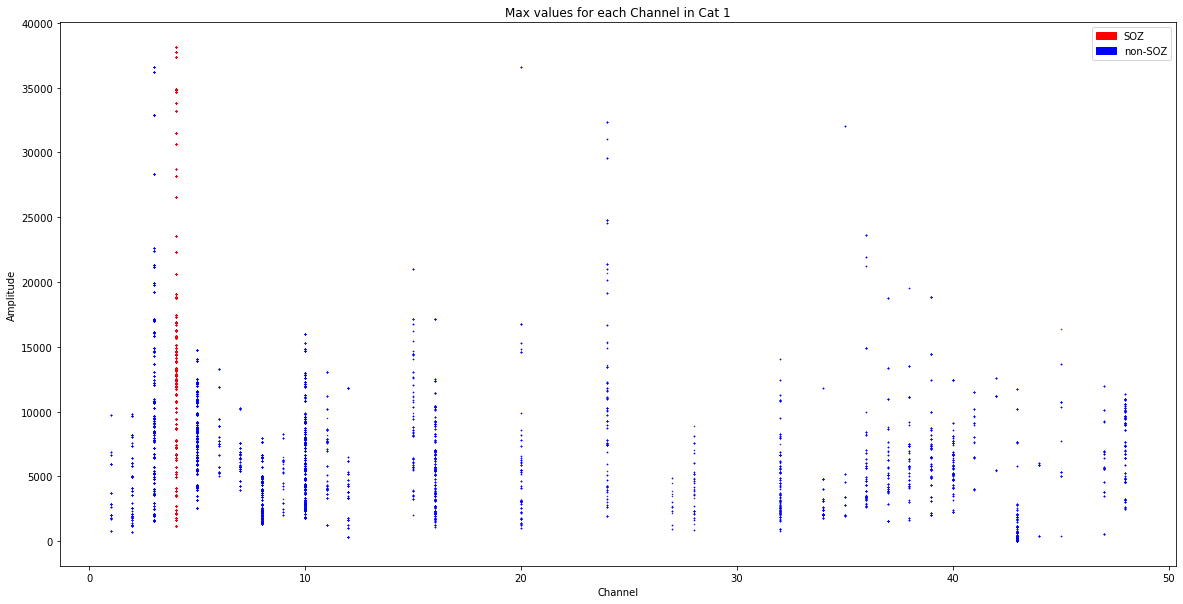

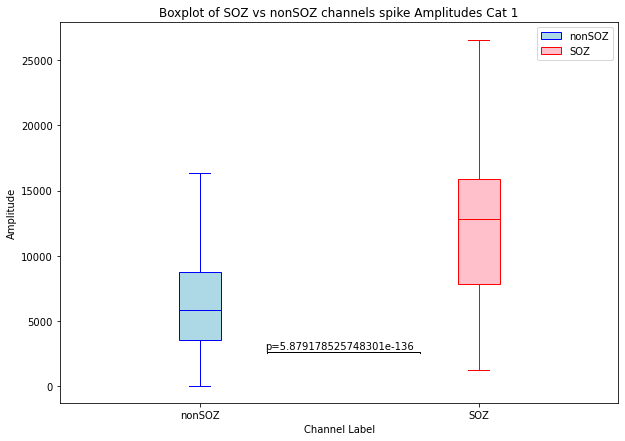

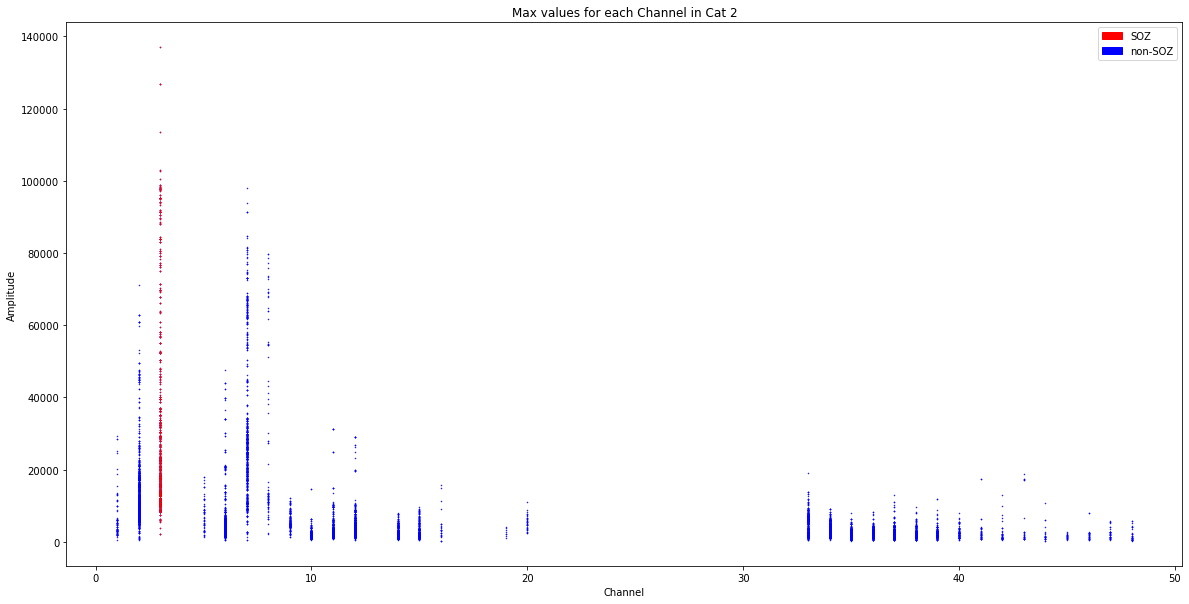

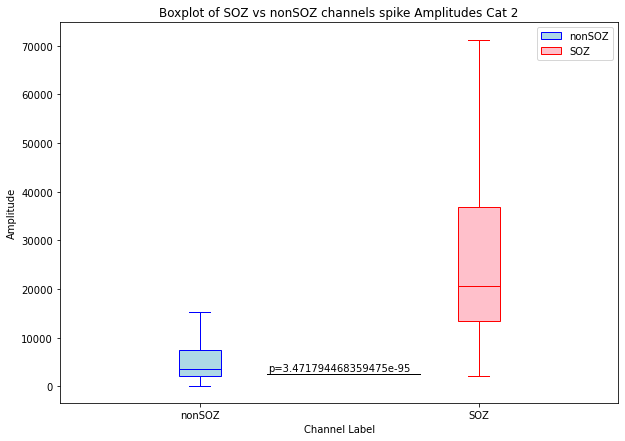

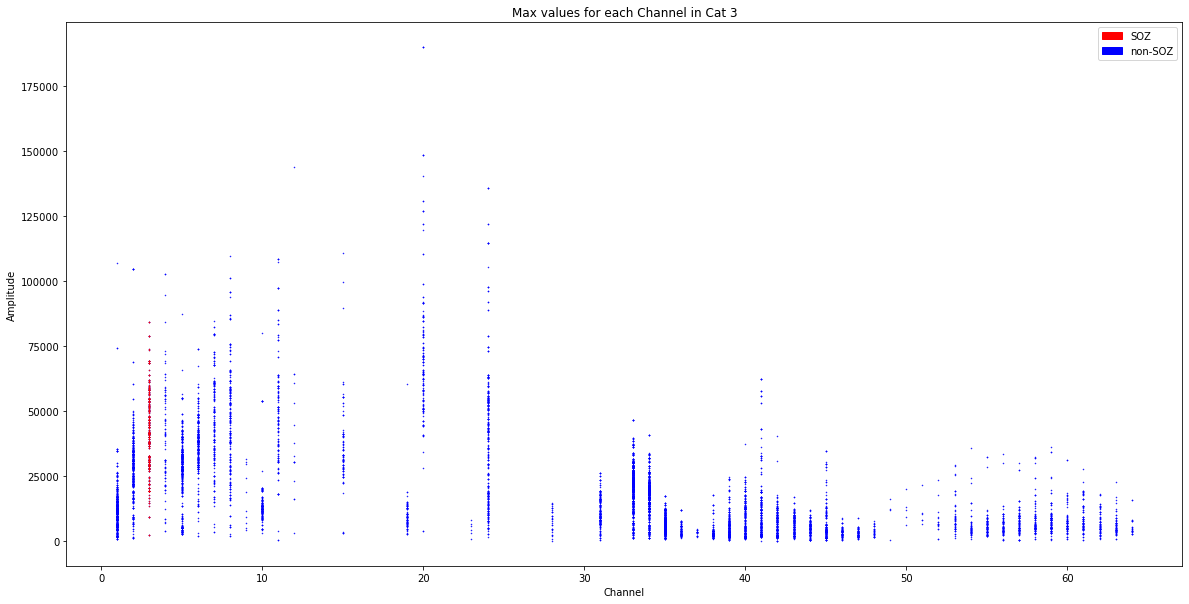

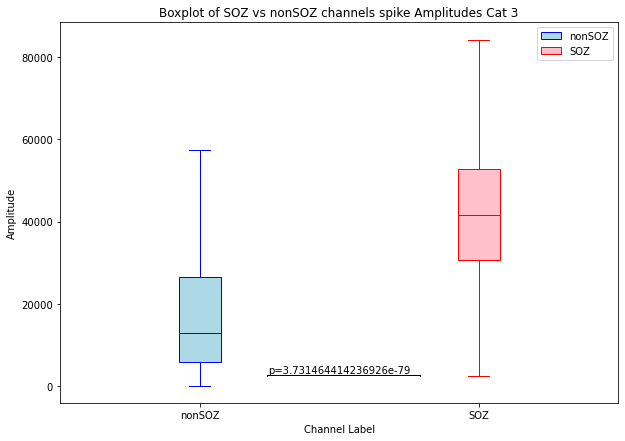

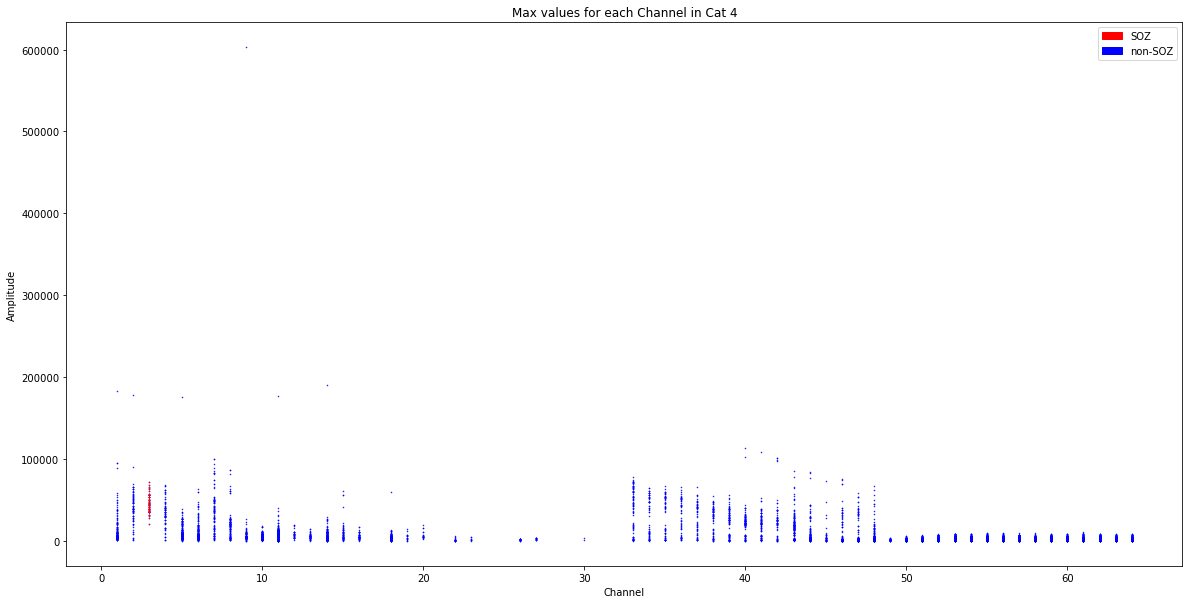

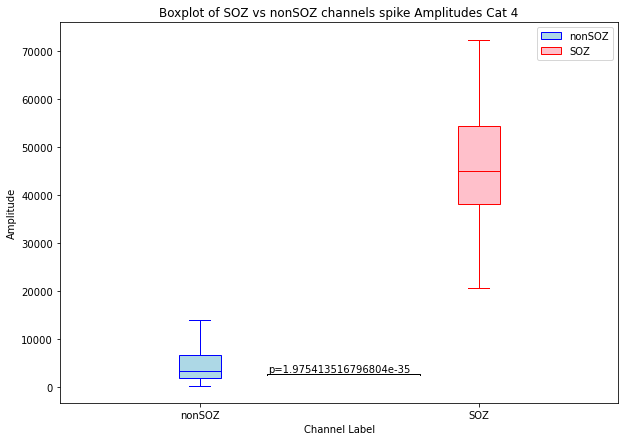

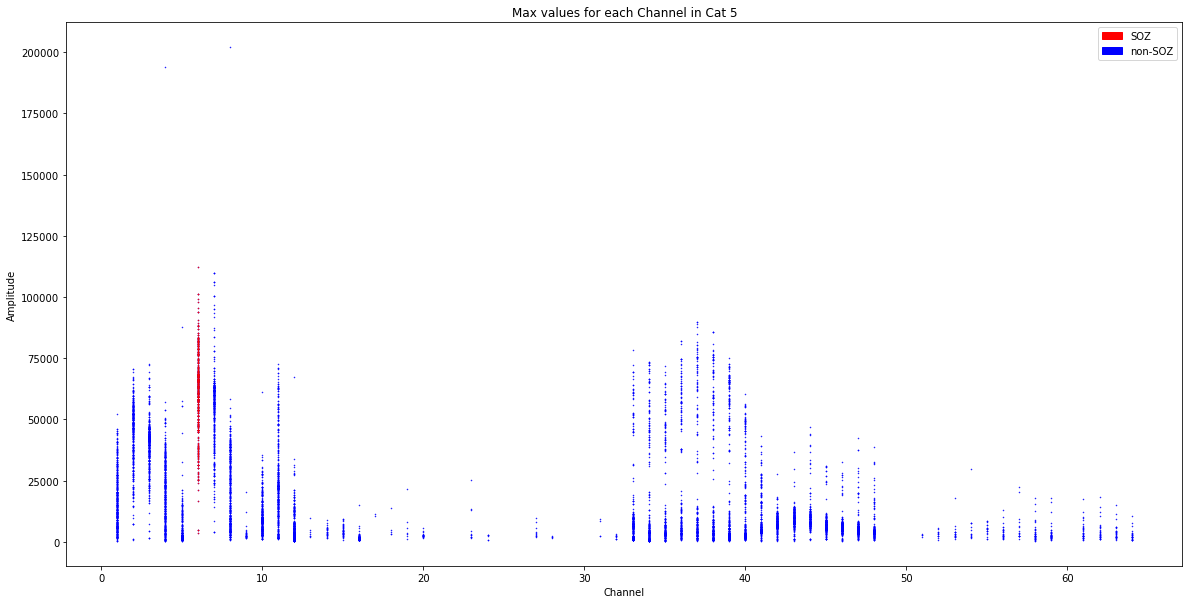

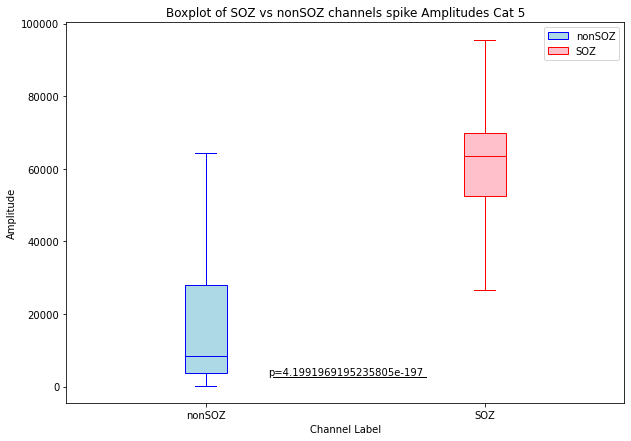

In [35]:
for i in range(len(cats)):
    plot_scatter(cats[i],whichPts[i])
    plot_box_per_pt(cats[i],whichPts[i])

In [36]:
#MEAN BETA BANDPOWER
cats = [cat1,cat2,cat3,cat4,cat5] #list of dictionaries
whichPts = range(5)

cat_pvals = []
cat_SOZ_all = []
cat_nonSOZ_all =[]

for i in range(len(cats)):
    pval, SOZ_all, nonSOZ_all = calc_maxes_and_stats(cats[i], whichPts[i])
    cat_SOZ_all.append(SOZ_all)
    cat_nonSOZ_all.append(nonSOZ_all)
    cat_pvals.append(pval)
    
SOZ_all_mean = [np.mean(x) for x in cat_SOZ_all]
nonSOZ_all_mean = [np.mean(x) for x in cat_nonSOZ_all]

ttest_rel(SOZ_all_mean,nonSOZ_all_mean)
print(ttest_rel(SOZ_all_mean,nonSOZ_all_mean))

Ttest_relResult(statistic=4.25846561308132, pvalue=0.013069568402171083)


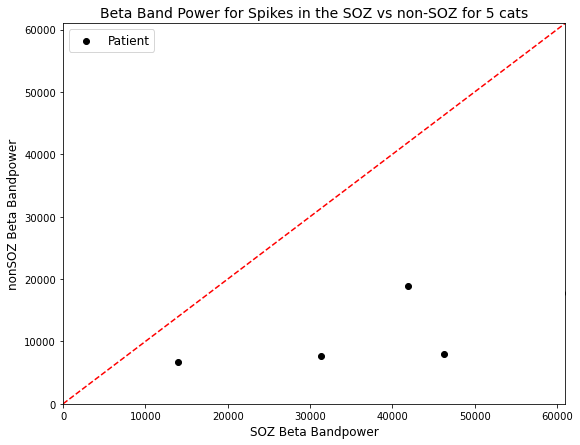

In [37]:
plt.figure(figsize=[9,7])
plt.title('Beta Band Power for Spikes in the SOZ vs non-SOZ for 5 cats',fontsize=14)
plt.scatter(SOZ_all_mean,nonSOZ_all_mean,color='k',marker='o',label='Patient')
plt.xlabel('SOZ Beta Bandpower',fontsize=12)
plt.ylabel('nonSOZ Beta Bandpower',fontsize=12)
y = np.arange(0,61000,1)
x = np.arange(0,61000,1)
plt.ylim([0,61000])
plt.xlim([0,61000])
plt.plot(x,y,linestyle='dashed',color='r')
plt.legend(fontsize=12)
#plt.savefig('fig_2_pts.jpeg',dpi=100)
plt.show()

---

In [38]:
#GAMMA Bandpower
def bandpower(x, fs, fmin, fmax):
    f, Pxx = sig.periodogram(x, fs=fs)
    ind_min = np.argmax(f > fmin) - 1
    ind_max = np.argmax(f > fmax) - 1
    return np.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])

def max_per_runtime(seqs,values,I):
    seq_concat = concat_seqs(I,seqs);
    if len(seq_concat) != 0: #skip past the "no spike detected" sequence runtimes
        ch_uniq = np.unique(seq_concat[:,0])
        all_maxvals = []
        for ch in ch_uniq:
            x = np.where(seq_concat[:,0] == ch)[0] #should give you an array with positions where that unique ch was used.
            all_maxes_per_ch = []
            for x in x: #calls on each array in x --> (example. i == [10 34, 70] for when spike channel == 7)
                val = values[I,0][x] - np.mean(values[I,0][x])
                max_val = bandpower(val, fs=len(val)-1, fmin = 25, fmax = 140) #FEATURE APPLICATIONS #AMPLITUDE
                #max_val = np.sum(np.absolute(np.ediff1d(val)))
                all_maxes_per_ch.append(max_val)
            all_maxvals.append([ch, all_maxes_per_ch]) 
    else: #the ones with spikes now
        all_maxvals = []
    return all_maxvals #will return all max values in a runtime

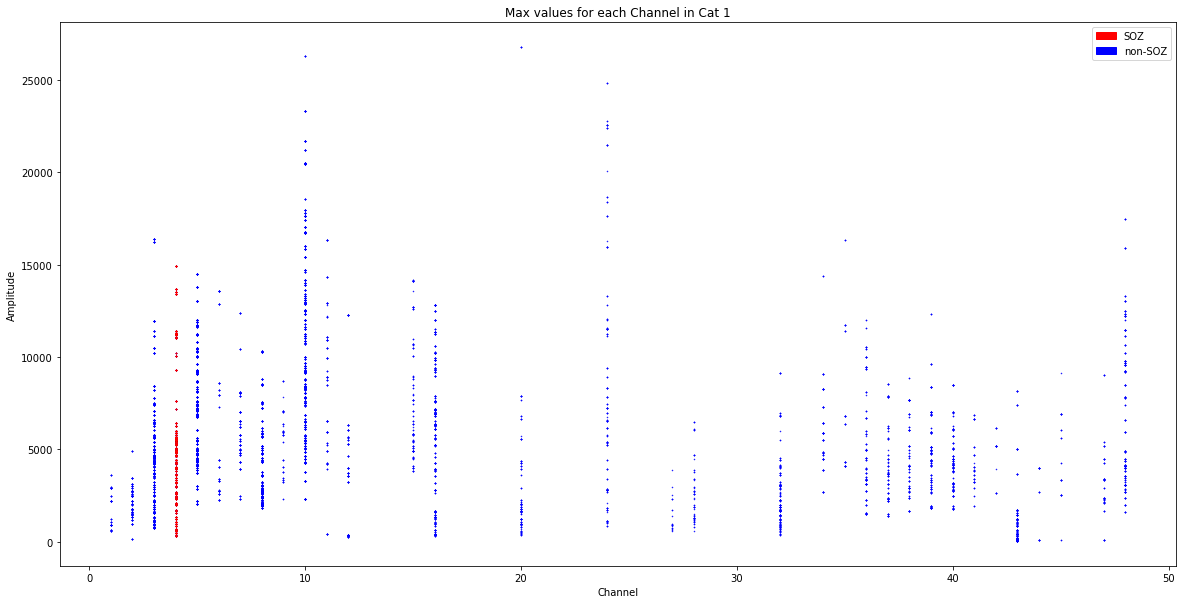

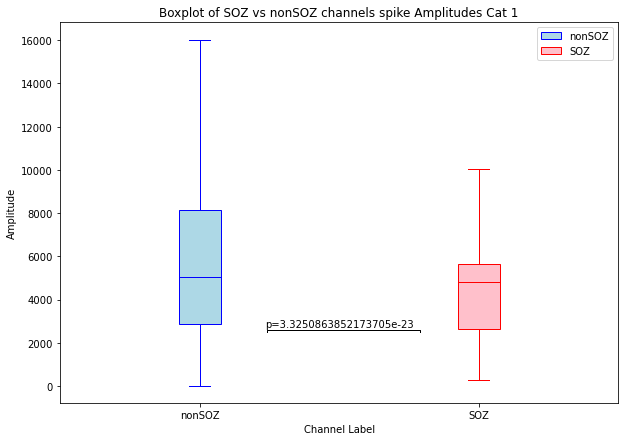

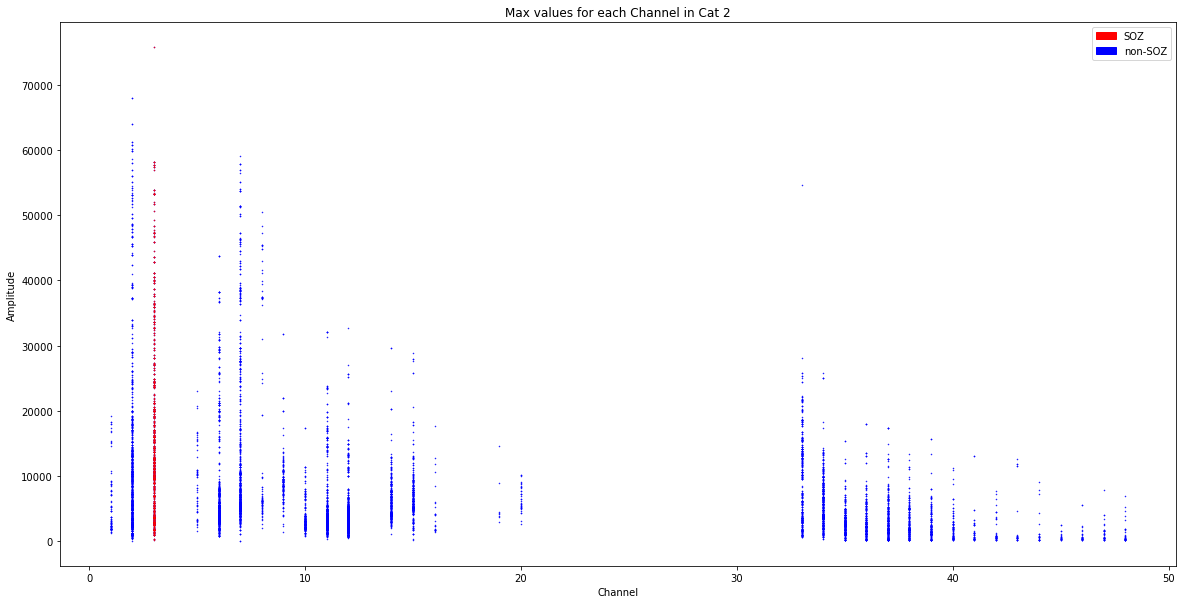

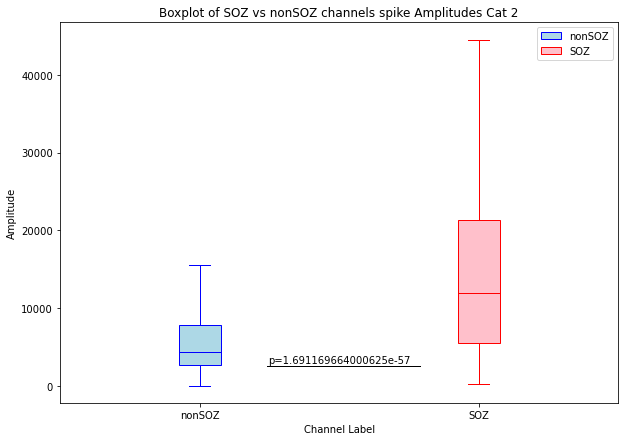

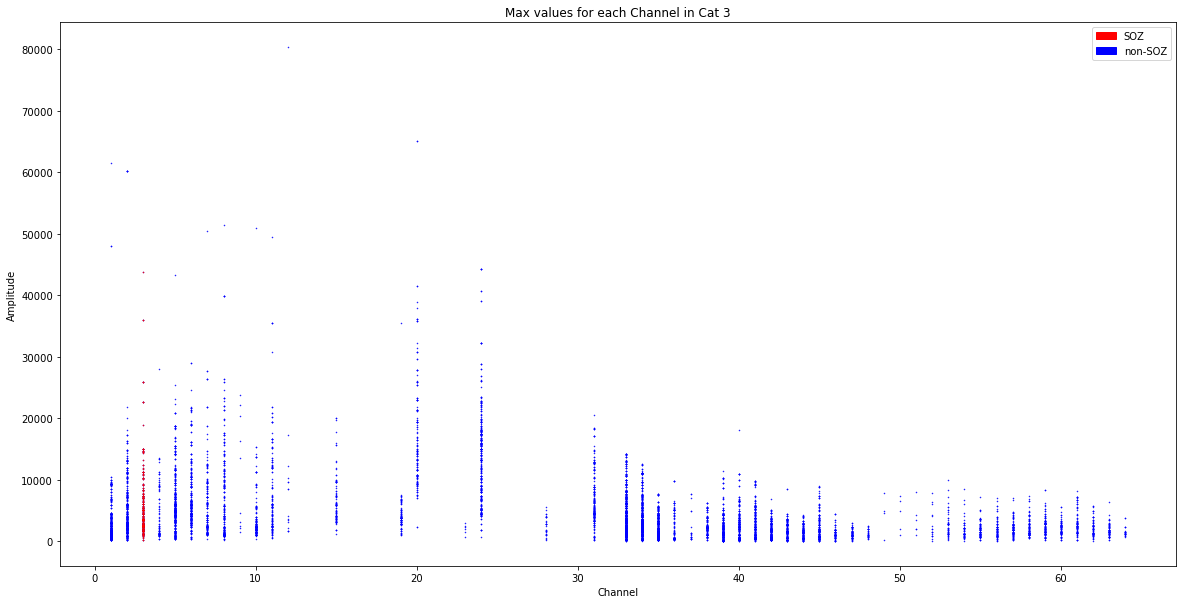

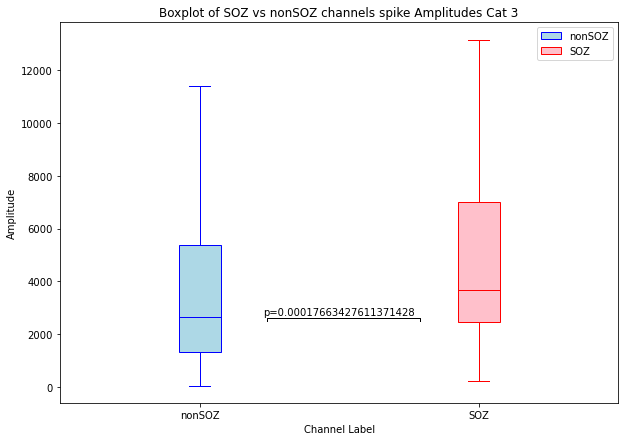

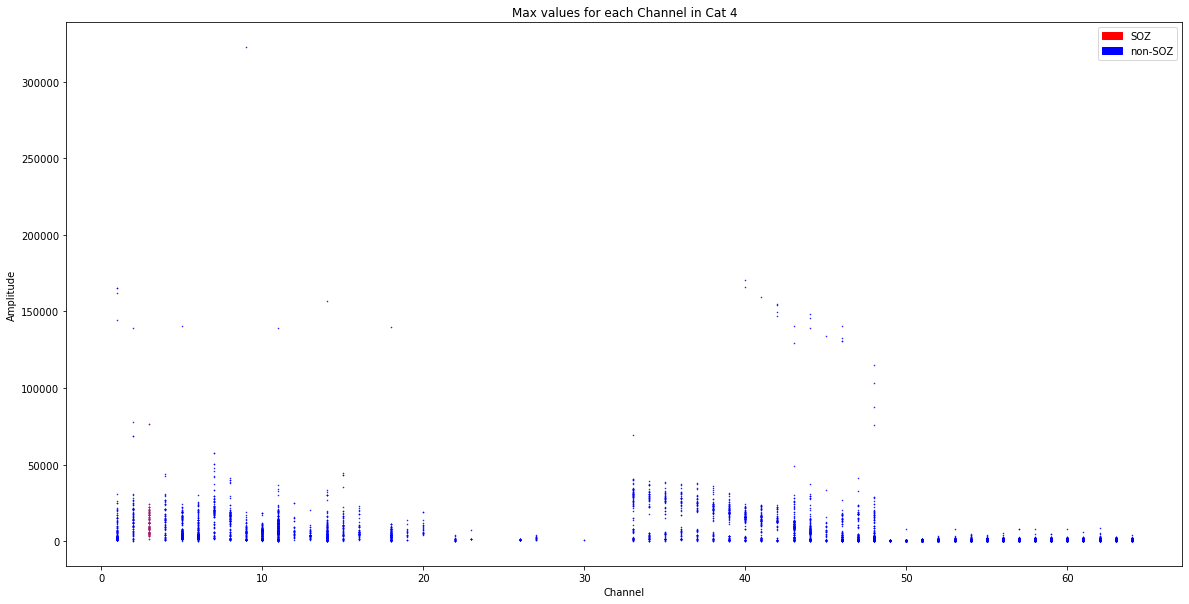

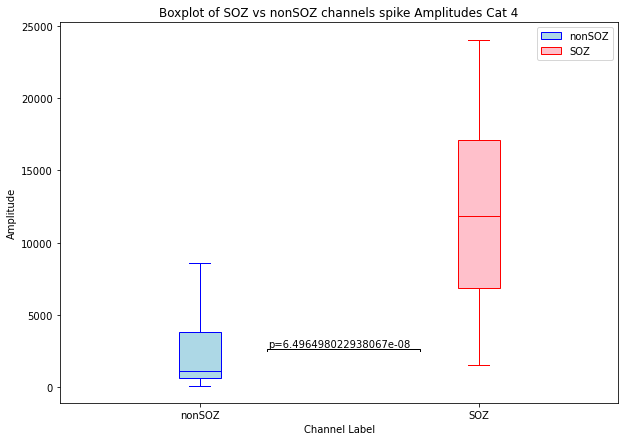

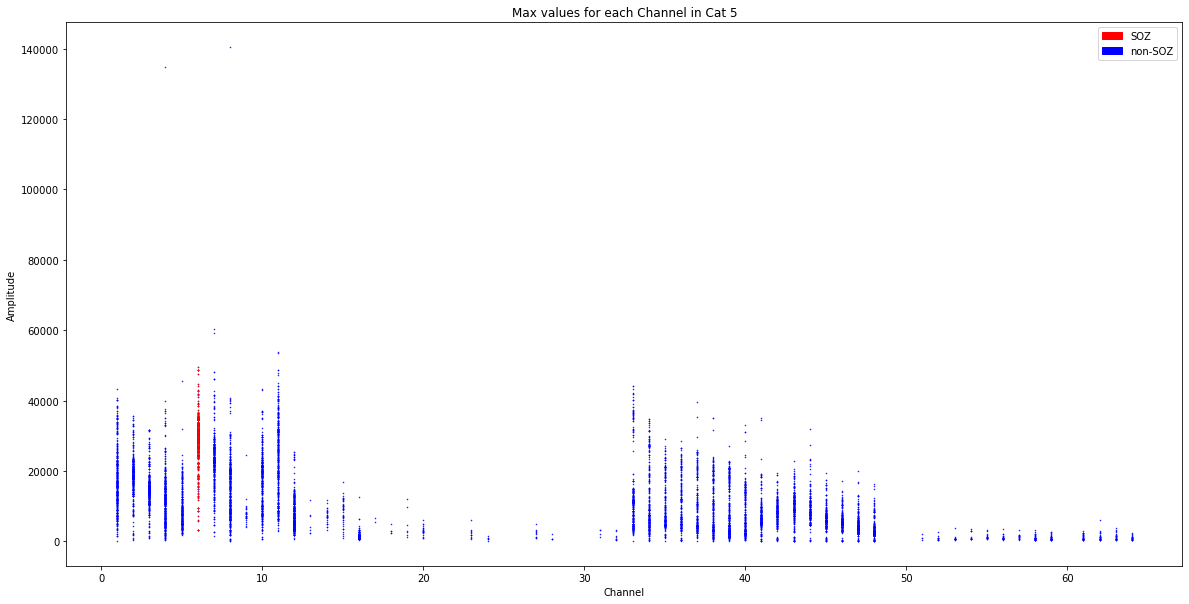

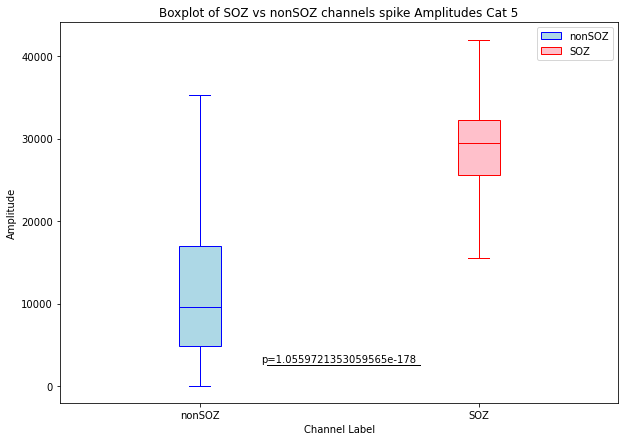

In [39]:
for i in range(len(cats)):
    plot_scatter(cats[i],whichPts[i])
    plot_box_per_pt(cats[i],whichPts[i])

In [40]:
#MEAN GAMMA BANDPOWER
cats = [cat1,cat2,cat3,cat4,cat5] #list of dictionaries
whichPts = range(5)

cat_pvals = []
cat_SOZ_all = []
cat_nonSOZ_all =[]

for i in range(len(cats)):
    pval, SOZ_all, nonSOZ_all = calc_maxes_and_stats(cats[i], whichPts[i])
    cat_SOZ_all.append(SOZ_all)
    cat_nonSOZ_all.append(nonSOZ_all)
    cat_pvals.append(pval)
    
SOZ_all_mean = [np.mean(x) for x in cat_SOZ_all]
nonSOZ_all_mean = [np.mean(x) for x in cat_nonSOZ_all]

ttest_rel(SOZ_all_mean,nonSOZ_all_mean)
print(ttest_rel(SOZ_all_mean,nonSOZ_all_mean))

Ttest_relResult(statistic=2.1722039555883654, pvalue=0.0955741226086197)


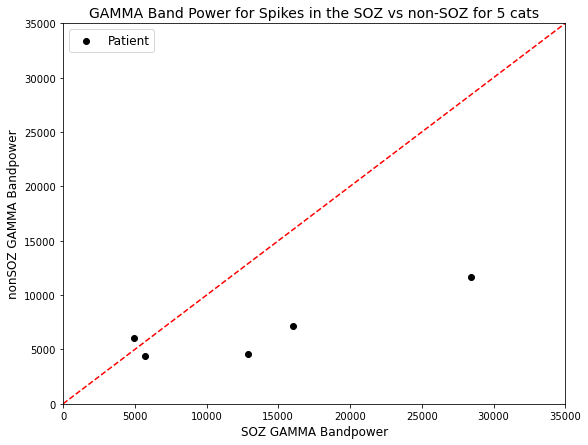

In [41]:
plt.figure(figsize=[9,7])
plt.title('GAMMA Band Power for Spikes in the SOZ vs non-SOZ for 5 cats',fontsize=14)
plt.scatter(SOZ_all_mean,nonSOZ_all_mean,color='k',marker='o',label='Patient')
plt.xlabel('SOZ GAMMA Bandpower',fontsize=12)
plt.ylabel('nonSOZ GAMMA Bandpower',fontsize=12)
y = np.arange(0,35000,1)
x = np.arange(0,35000,1)
plt.ylim([0,35000])
plt.xlim([0,35000])
plt.plot(x,y,linestyle='dashed',color='r')
plt.legend(fontsize=12)
#plt.savefig('fig_2_pts.jpeg',dpi=100)
plt.show()

---

In [42]:
#THETA Bandpower
def bandpower(x, fs, fmin, fmax):
    f, Pxx = sig.periodogram(x, fs=fs)
    ind_min = np.argmax(f > fmin) - 1
    ind_max = np.argmax(f > fmax) - 1
    return np.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])

def max_per_runtime(seqs,values,I):
    seq_concat = concat_seqs(I,seqs);
    if len(seq_concat) != 0: #skip past the "no spike detected" sequence runtimes
        ch_uniq = np.unique(seq_concat[:,0])
        all_maxvals = []
        for ch in ch_uniq:
            x = np.where(seq_concat[:,0] == ch)[0] #should give you an array with positions where that unique ch was used.
            all_maxes_per_ch = []
            for x in x: #calls on each array in x --> (example. i == [10 34, 70] for when spike channel == 7)
                val = values[I,0][x] - np.mean(values[I,0][x])
                max_val = bandpower(val, fs=len(val)-1, fmin = 4, fmax = 7) #FEATURE APPLICATIONS #AMPLITUDE
                #max_val = np.sum(np.absolute(np.ediff1d(val)))
                all_maxes_per_ch.append(max_val)
            all_maxvals.append([ch, all_maxes_per_ch]) 
    else: #the ones with spikes now
        all_maxvals = []
    return all_maxvals #will return all max values in a runtime

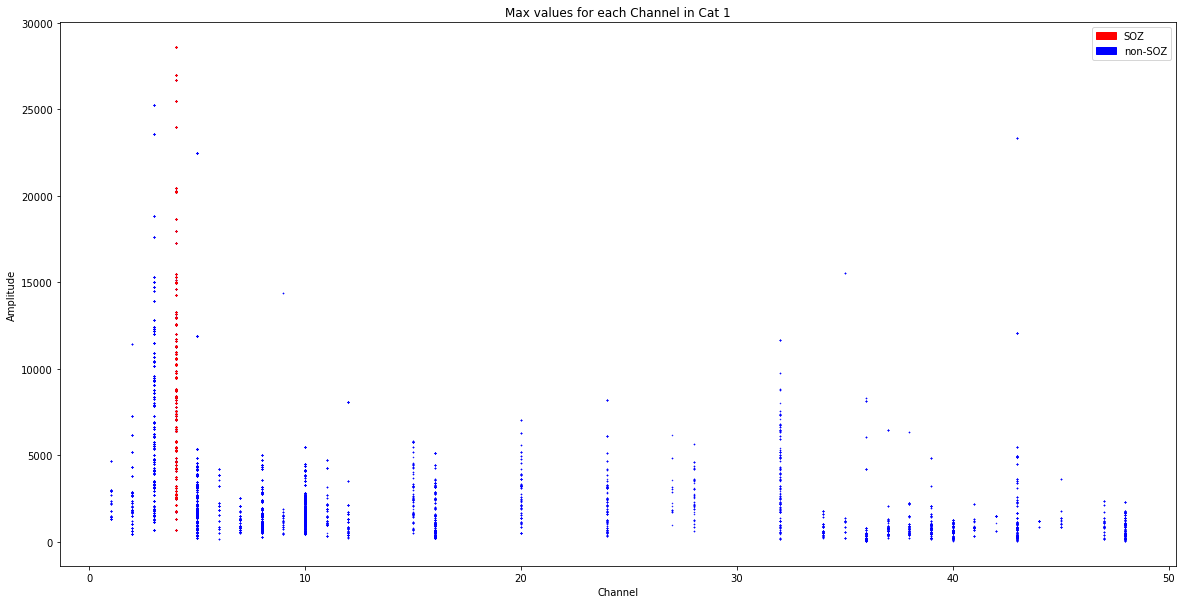

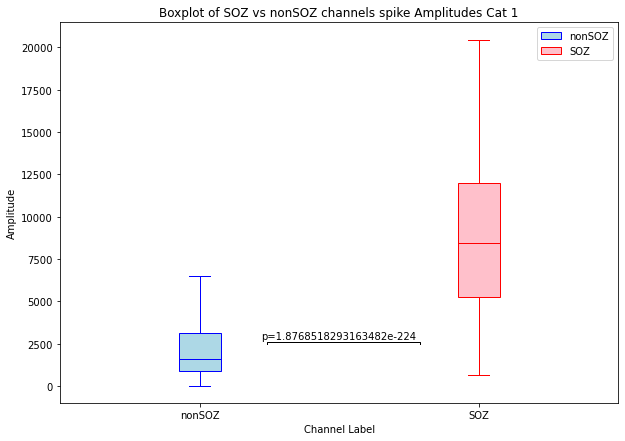

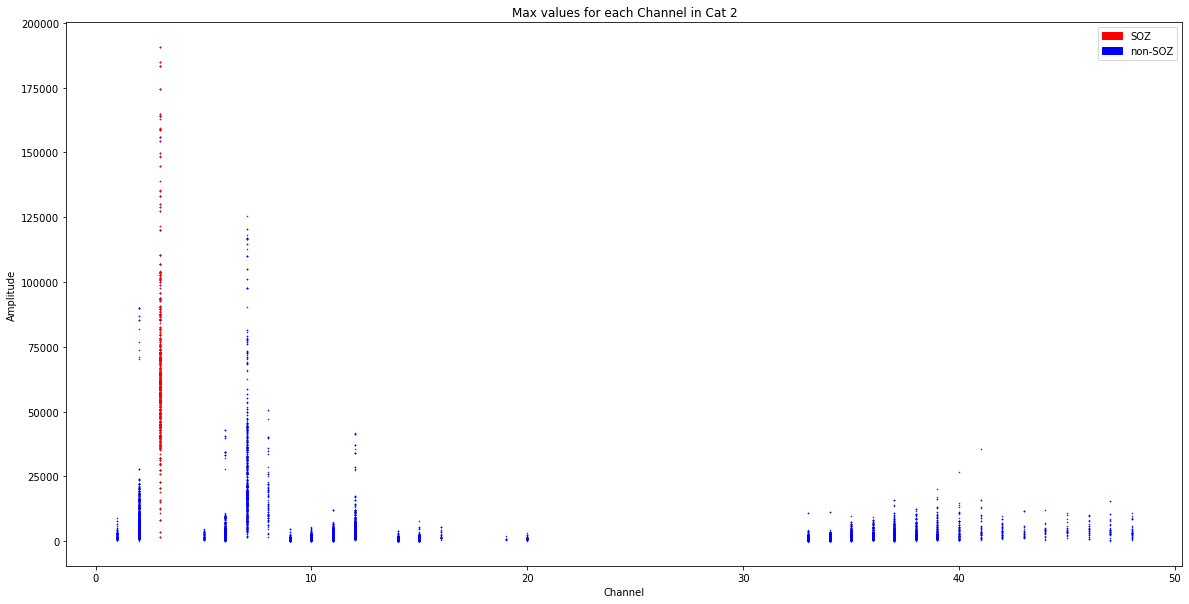

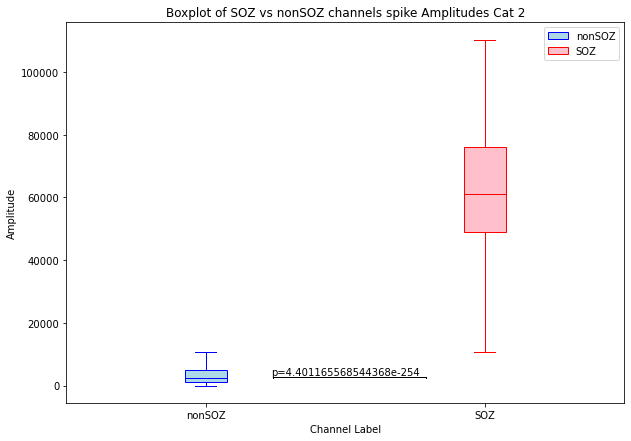

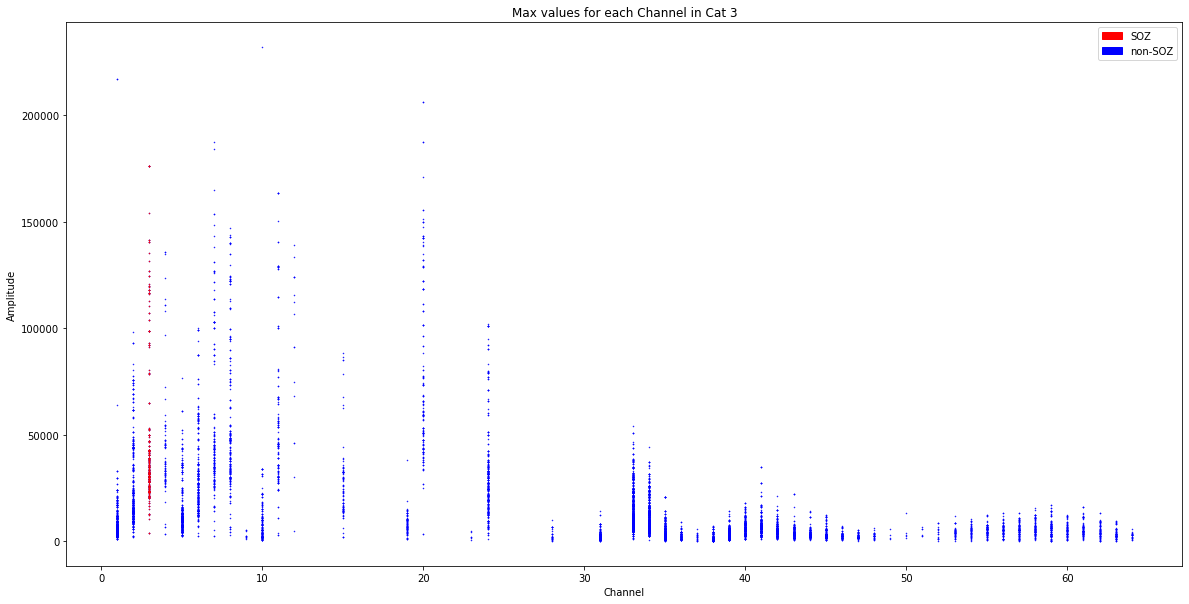

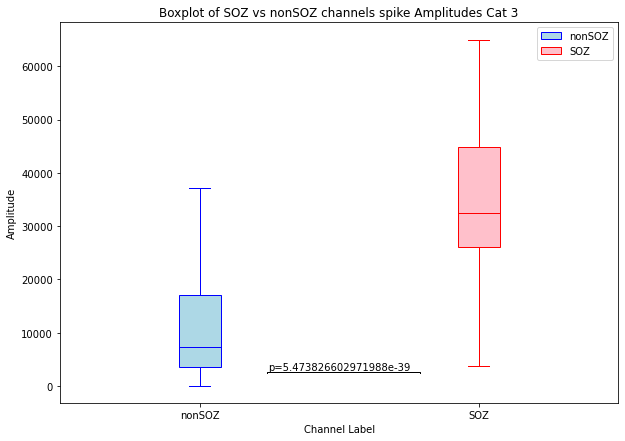

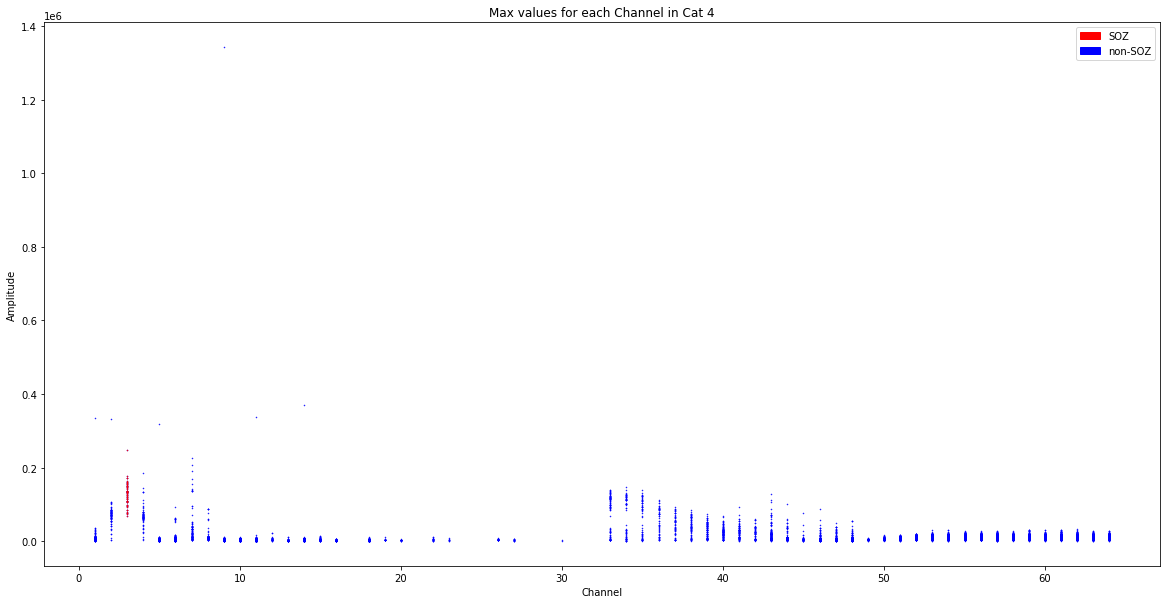

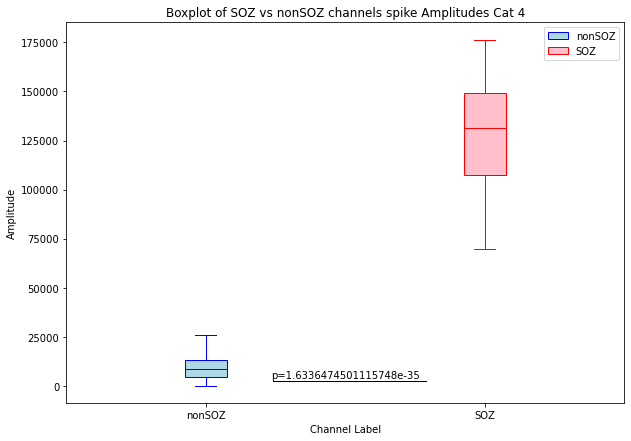

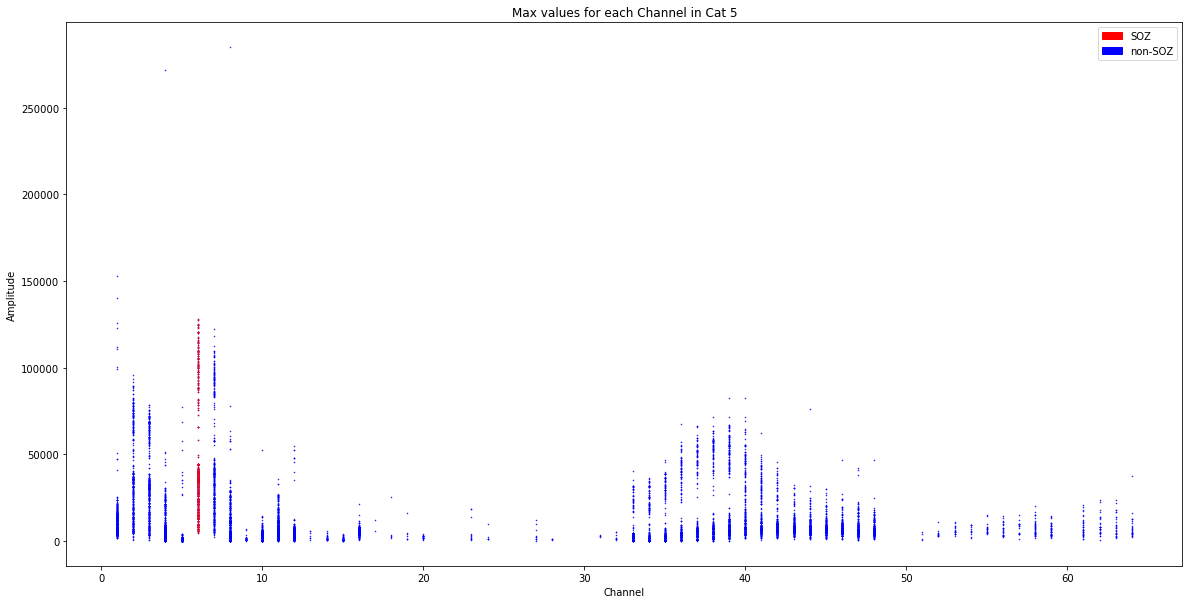

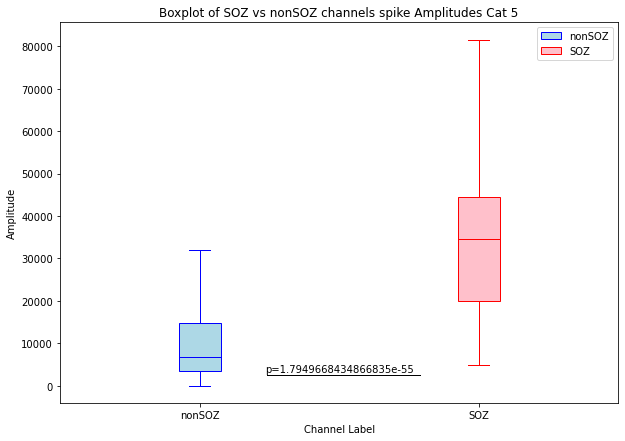

In [43]:
for i in range(len(cats)):
    plot_scatter(cats[i],whichPts[i])
    plot_box_per_pt(cats[i],whichPts[i])

In [44]:
#THETA GAMMA BANDPOWER
cats = [cat1,cat2,cat3,cat4,cat5] #list of dictionaries
whichPts = range(5)

cat_pvals = []
cat_SOZ_all = []
cat_nonSOZ_all =[]

for i in range(len(cats)):
    pval, SOZ_all, nonSOZ_all = calc_maxes_and_stats(cats[i], whichPts[i])
    cat_SOZ_all.append(SOZ_all)
    cat_nonSOZ_all.append(nonSOZ_all)
    cat_pvals.append(pval)
    
SOZ_all_mean = [np.mean(x) for x in cat_SOZ_all]
nonSOZ_all_mean = [np.mean(x) for x in cat_nonSOZ_all]

ttest_rel(SOZ_all_mean,nonSOZ_all_mean)
print(ttest_rel(SOZ_all_mean,nonSOZ_all_mean))

Ttest_relResult(statistic=2.645219544703913, pvalue=0.05726704298161871)


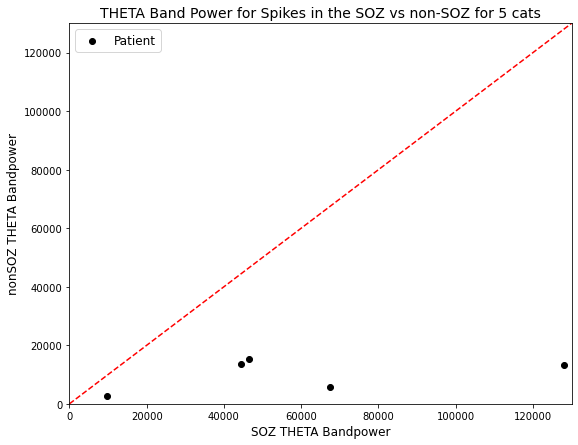

In [45]:
plt.figure(figsize=[9,7])
plt.title('THETA Band Power for Spikes in the SOZ vs non-SOZ for 5 cats',fontsize=14)
plt.scatter(SOZ_all_mean,nonSOZ_all_mean,color='k',marker='o',label='Patient')
plt.xlabel('SOZ THETA Bandpower',fontsize=12)
plt.ylabel('nonSOZ THETA Bandpower',fontsize=12)
y = np.arange(0,130000,1)
x = np.arange(0,130000,1)
plt.ylim([0,130000])
plt.xlim([0,130000])
plt.plot(x,y,linestyle='dashed',color='r')
plt.legend(fontsize=12)
#plt.savefig('fig_2_pts.jpeg',dpi=100)
plt.show()

---

In [46]:
#ALPHA Bandpower
def bandpower(x, fs, fmin, fmax):
    f, Pxx = sig.periodogram(x, fs=fs)
    ind_min = np.argmax(f > fmin) - 1
    ind_max = np.argmax(f > fmax) - 1
    return np.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])

def max_per_runtime(seqs,values,I):
    seq_concat = concat_seqs(I,seqs);
    if len(seq_concat) != 0: #skip past the "no spike detected" sequence runtimes
        ch_uniq = np.unique(seq_concat[:,0])
        all_maxvals = []
        for ch in ch_uniq:
            x = np.where(seq_concat[:,0] == ch)[0] #should give you an array with positions where that unique ch was used.
            all_maxes_per_ch = []
            for x in x: #calls on each array in x --> (example. i == [10 34, 70] for when spike channel == 7)
                val = values[I,0][x] - np.mean(values[I,0][x])
                max_val = bandpower(val, fs=len(val)-1, fmin = 7, fmax = 12) #FEATURE APPLICATIONS #AMPLITUDE
                #max_val = np.sum(np.absolute(np.ediff1d(val)))
                all_maxes_per_ch.append(max_val)
            all_maxvals.append([ch, all_maxes_per_ch]) 
    else: #the ones with spikes now
        all_maxvals = []
    return all_maxvals #will return all max values in a runtime


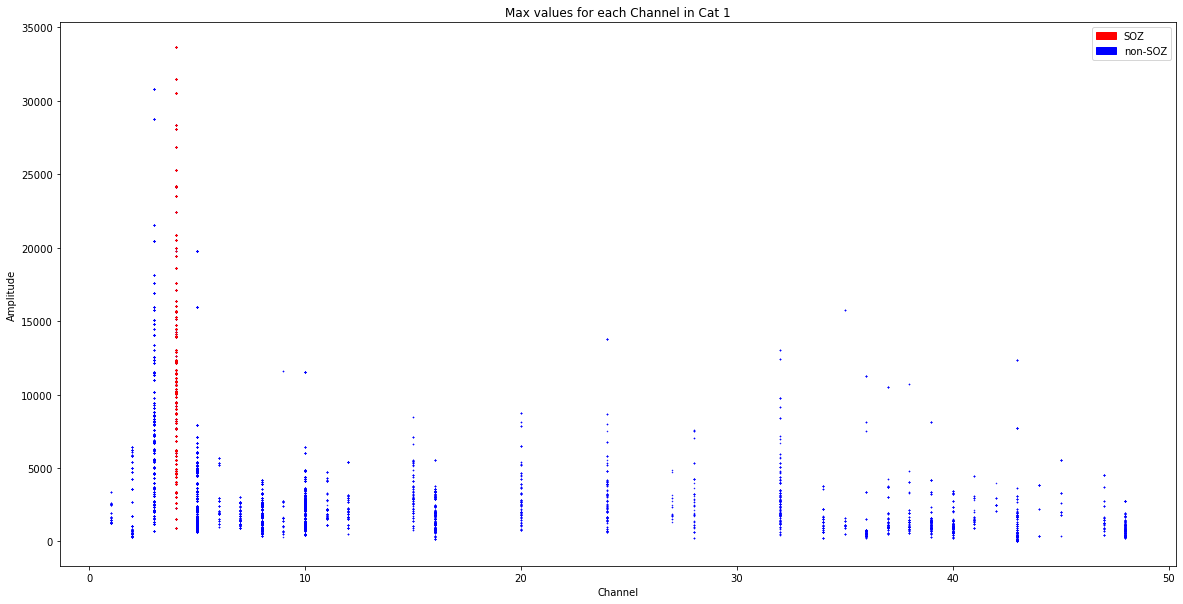

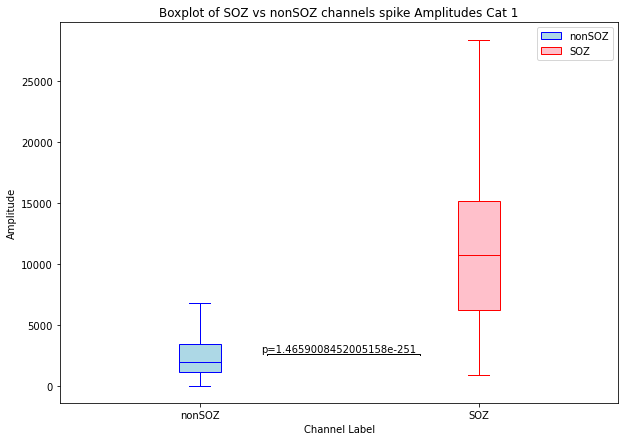

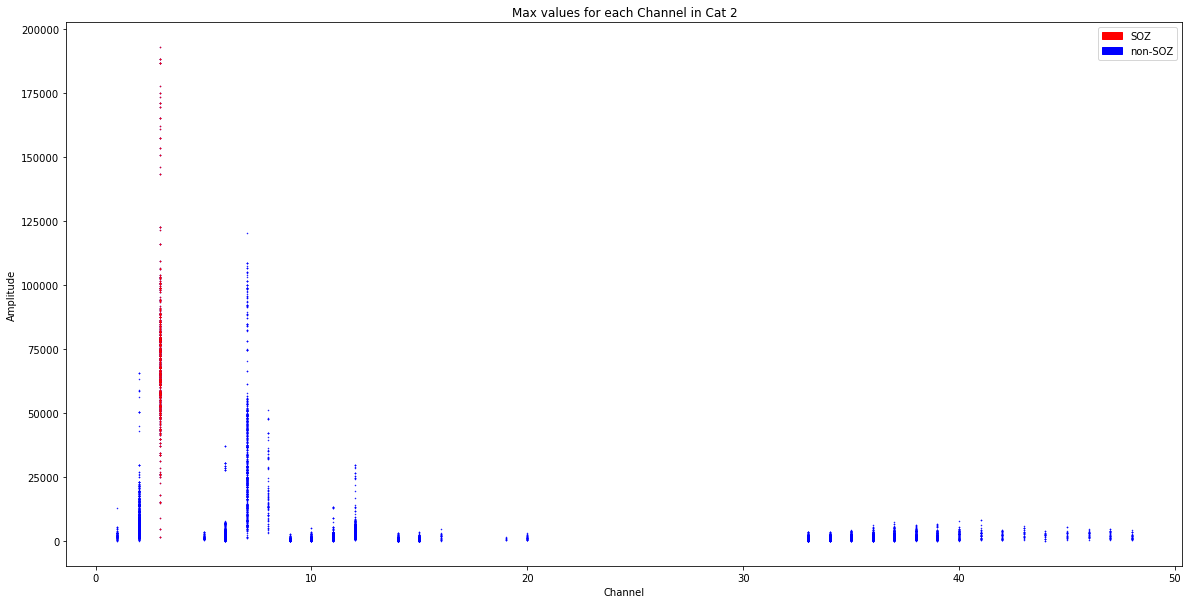

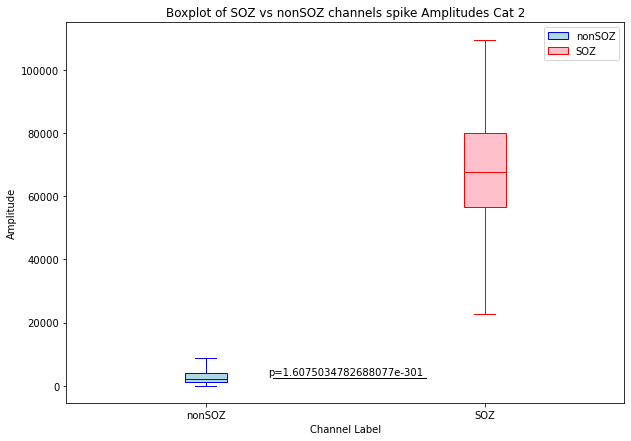

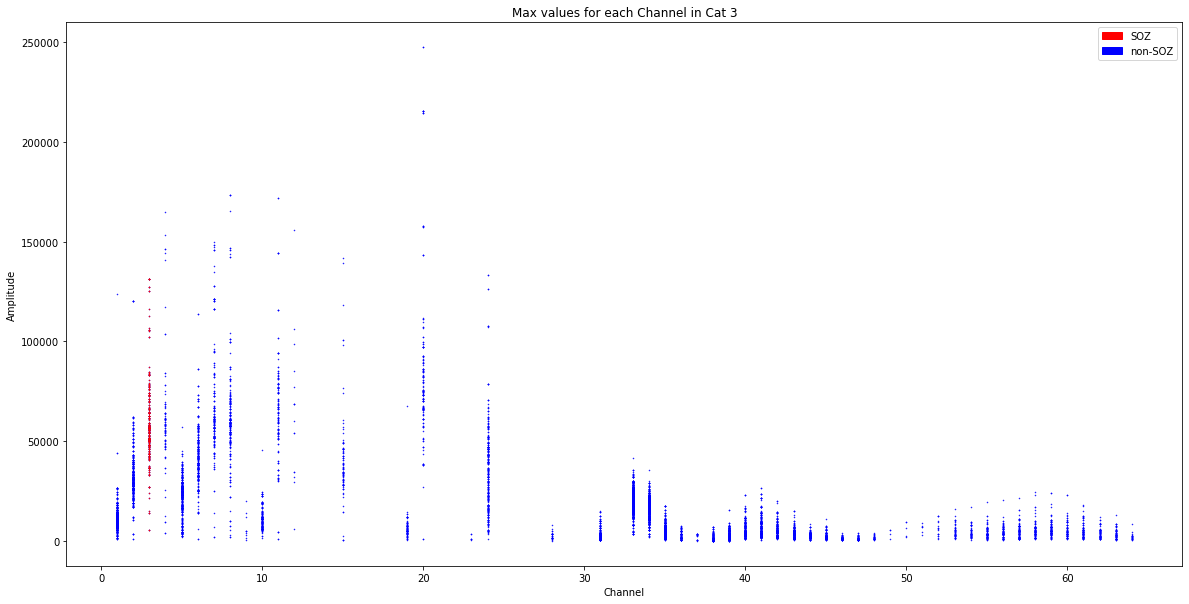

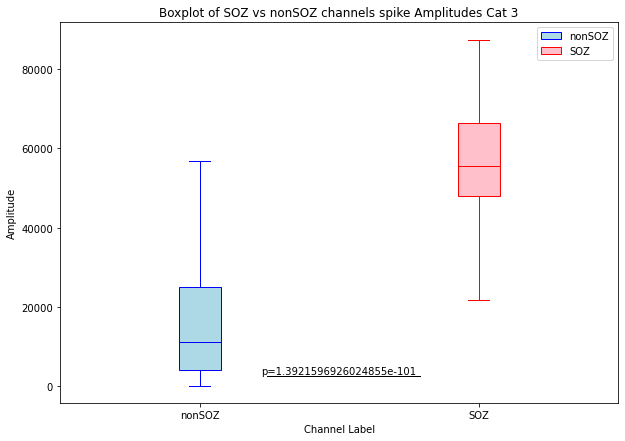

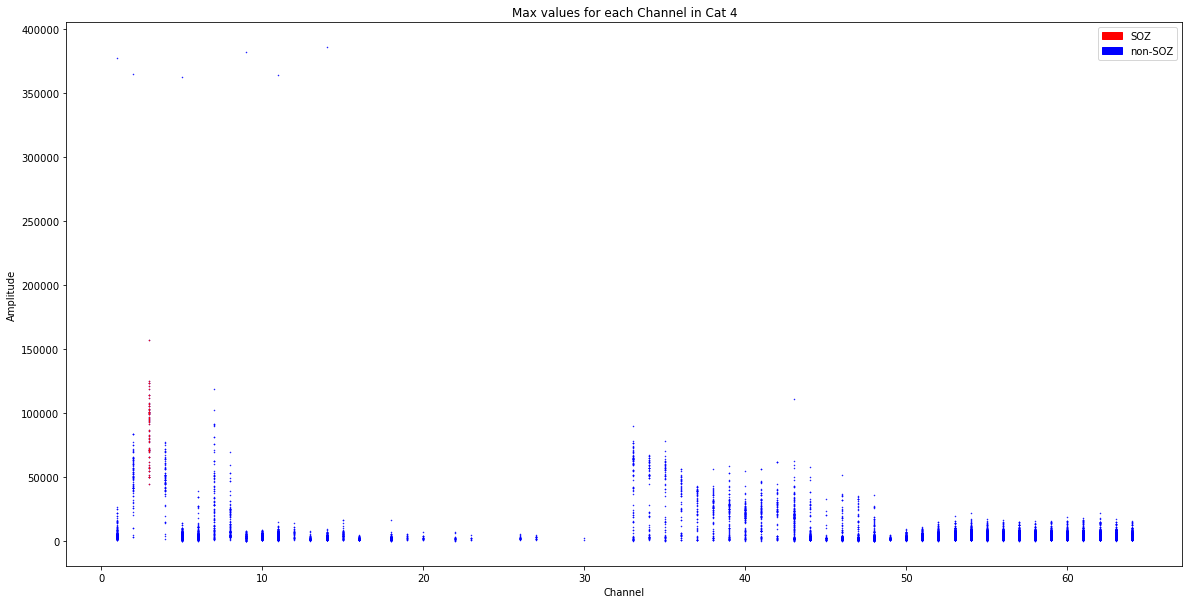

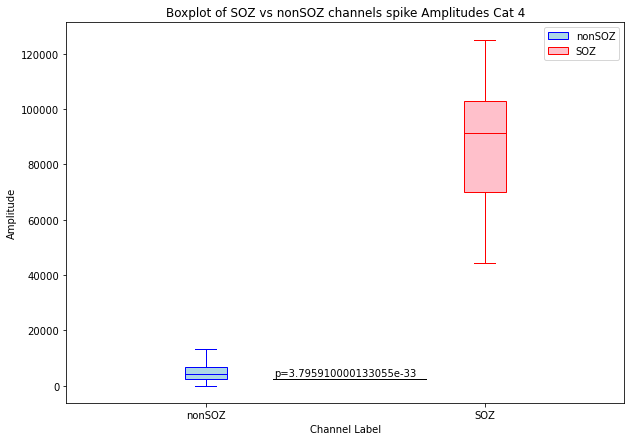

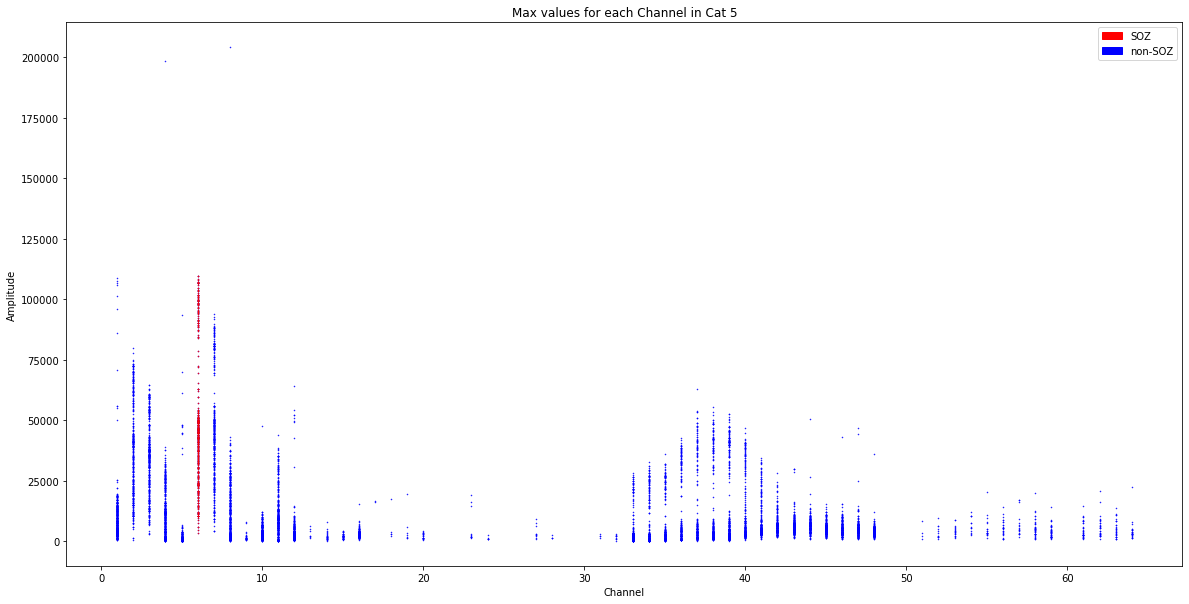

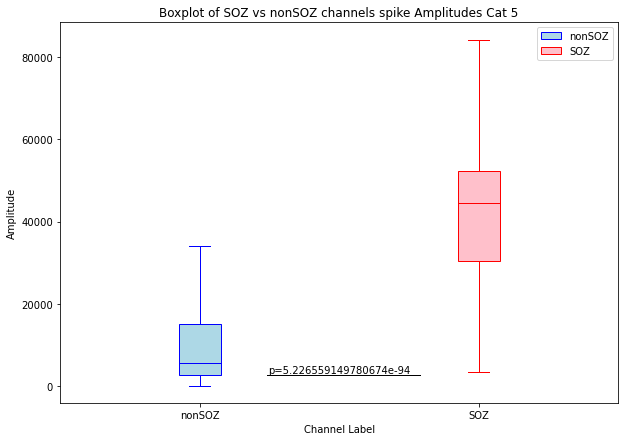

In [47]:
for i in range(len(cats)):
    plot_scatter(cats[i],whichPts[i])
    plot_box_per_pt(cats[i],whichPts[i])

In [48]:
#ALPHA BANDPOWER
cats = [cat1,cat2,cat3,cat4,cat5] #list of dictionaries
whichPts = range(5)

cat_pvals = []
cat_SOZ_all = []
cat_nonSOZ_all =[]

for i in range(len(cats)):
    pval, SOZ_all, nonSOZ_all = calc_maxes_and_stats(cats[i], whichPts[i])
    cat_SOZ_all.append(SOZ_all)
    cat_nonSOZ_all.append(nonSOZ_all)
    cat_pvals.append(pval)
    
SOZ_all_mean = [np.mean(x) for x in cat_SOZ_all]
nonSOZ_all_mean = [np.mean(x) for x in cat_nonSOZ_all]

ttest_rel(SOZ_all_mean,nonSOZ_all_mean)
print(ttest_rel(SOZ_all_mean,nonSOZ_all_mean))

Ttest_relResult(statistic=3.7629357045300456, pvalue=0.019724673466808073)


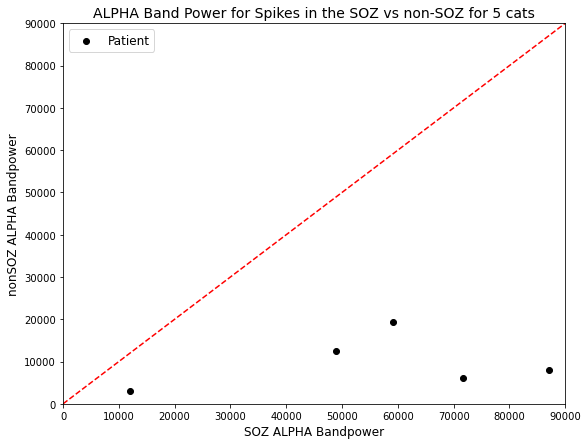

In [49]:
plt.figure(figsize=[9,7])
plt.title('ALPHA Band Power for Spikes in the SOZ vs non-SOZ for 5 cats',fontsize=14)
plt.scatter(SOZ_all_mean,nonSOZ_all_mean,color='k',marker='o',label='Patient')
plt.xlabel('SOZ ALPHA Bandpower',fontsize=12)
plt.ylabel('nonSOZ ALPHA Bandpower',fontsize=12)
y = np.arange(0,90000,1)
x = np.arange(0,90000,1)
plt.ylim([0,90000])
plt.xlim([0,90000])
plt.plot(x,y,linestyle='dashed',color='r')
plt.legend(fontsize=12)
#plt.savefig('fig_2_pts.jpeg',dpi=100)
plt.show()

---

In [50]:
#DELTA Bandpower
def bandpower(x, fs, fmin, fmax):
    f, Pxx = sig.periodogram(x, fs=fs)
    ind_min = np.argmax(f > fmin) - 1
    ind_max = np.argmax(f > fmax) - 1
    return np.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])

def max_per_runtime(seqs,values,I):
    seq_concat = concat_seqs(I,seqs);
    if len(seq_concat) != 0: #skip past the "no spike detected" sequence runtimes
        ch_uniq = np.unique(seq_concat[:,0])
        all_maxvals = []
        for ch in ch_uniq:
            x = np.where(seq_concat[:,0] == ch)[0] #should give you an array with positions where that unique ch was used.
            all_maxes_per_ch = []
            for x in x: #calls on each array in x --> (example. i == [10 34, 70] for when spike channel == 7)
                val = values[I,0][x] - np.mean(values[I,0][x])
                max_val = bandpower(val, fs=len(val)-1, fmin = 0, fmax = 4) #FEATURE APPLICATIONS #AMPLITUDE
                #max_val = np.sum(np.absolute(np.ediff1d(val)))
                all_maxes_per_ch.append(max_val)
            all_maxvals.append([ch, all_maxes_per_ch]) 
    else: #the ones with spikes now
        all_maxvals = []
    return all_maxvals #will return all max values in a runtime

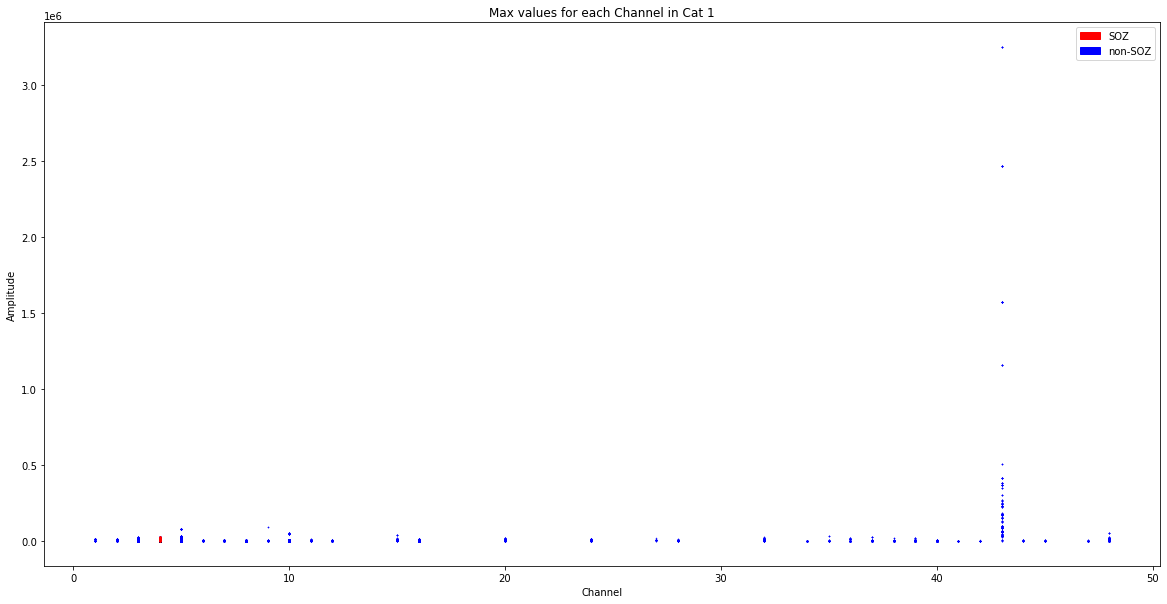

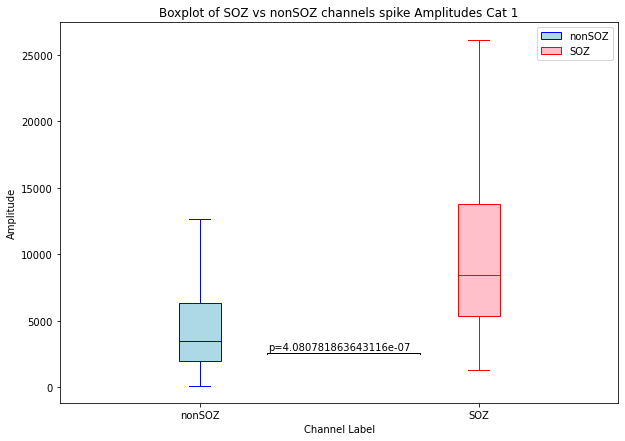

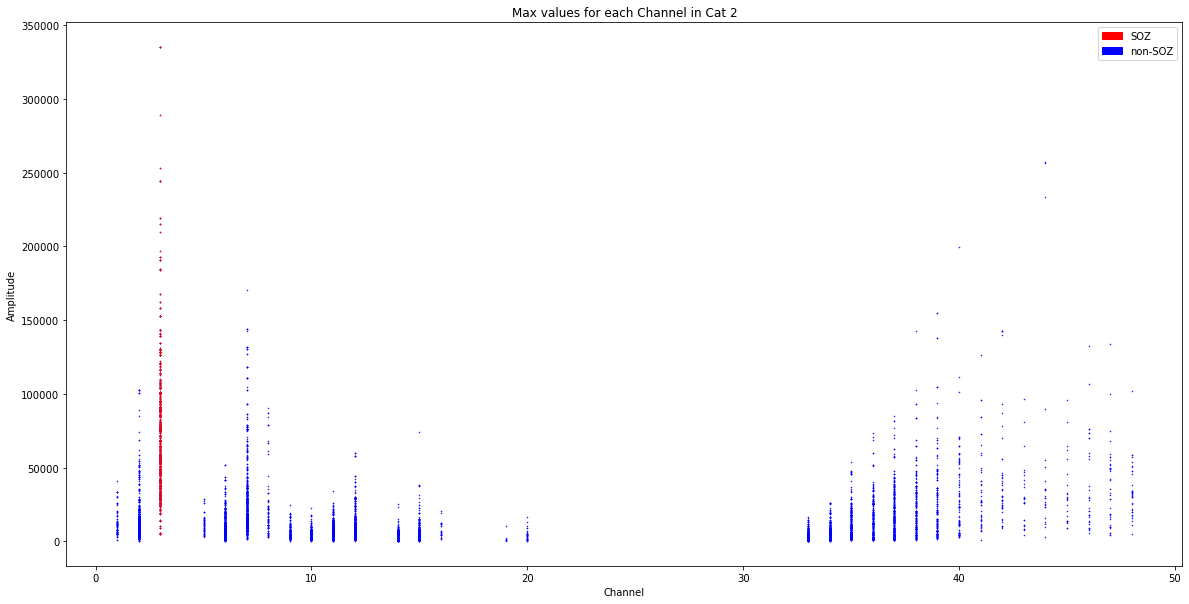

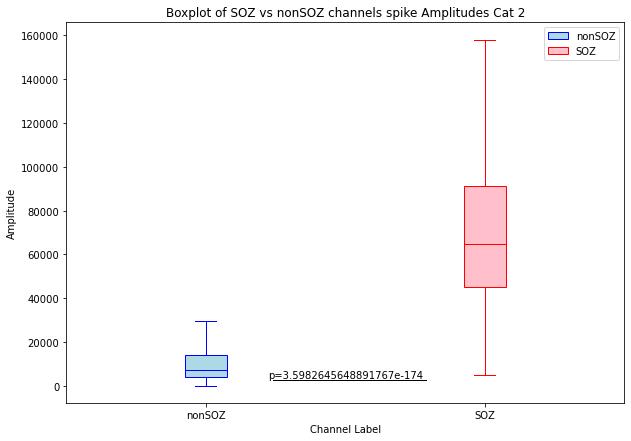

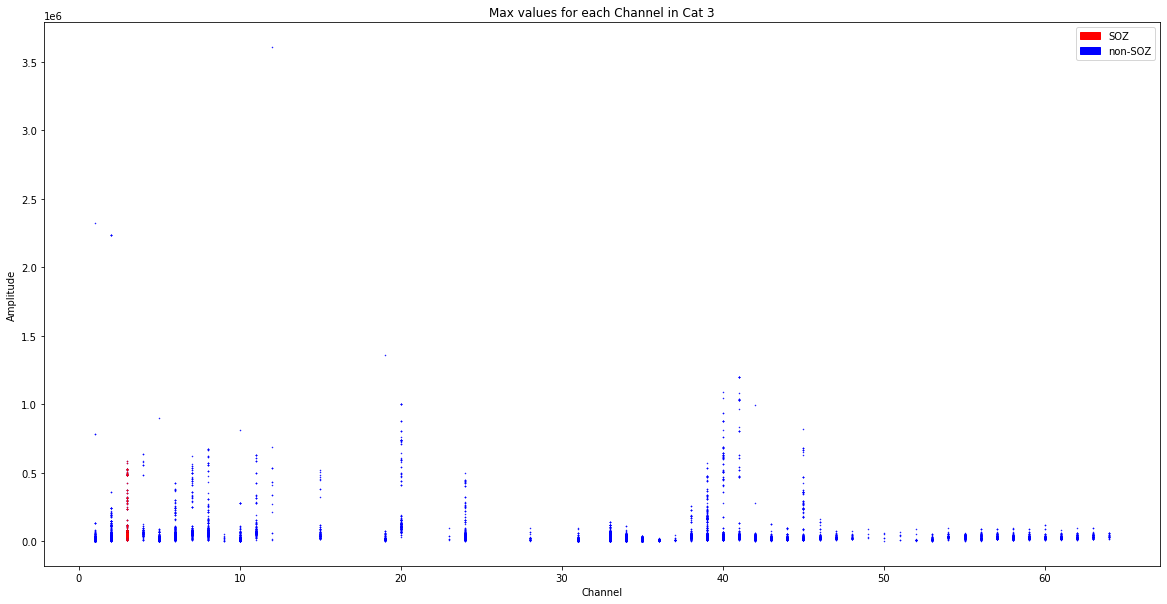

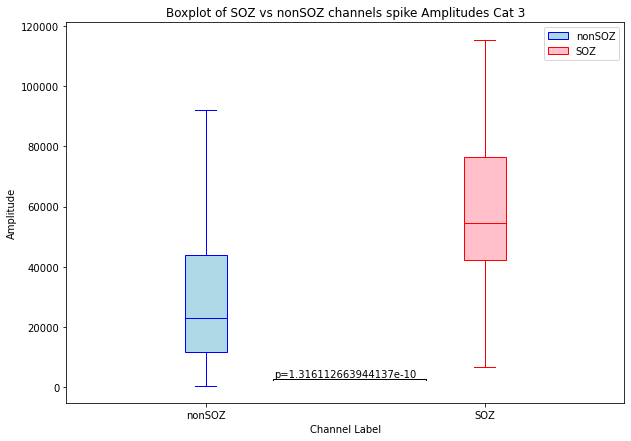

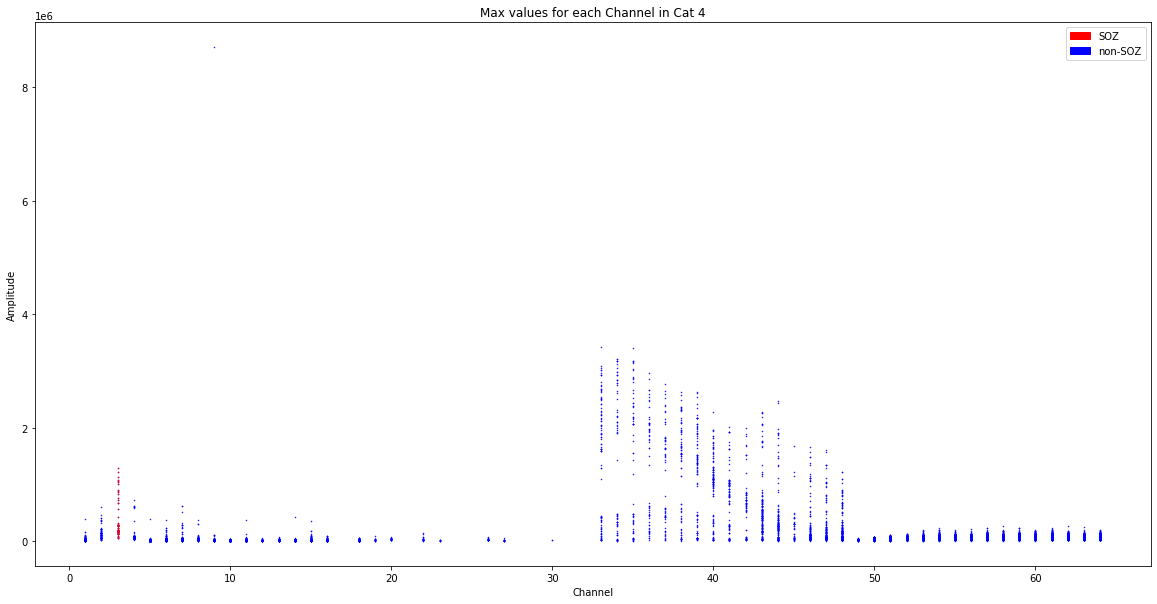

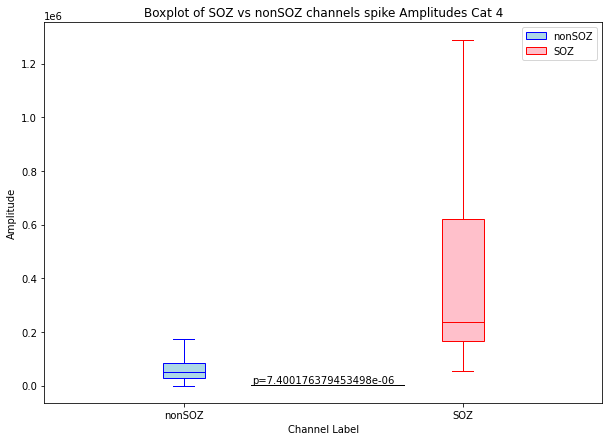

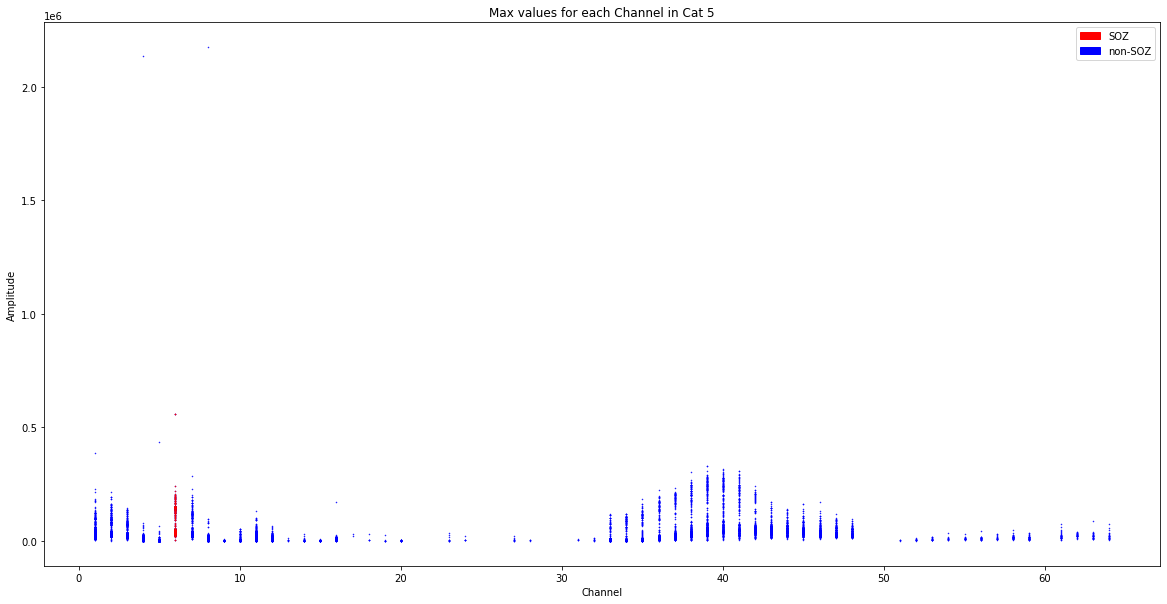

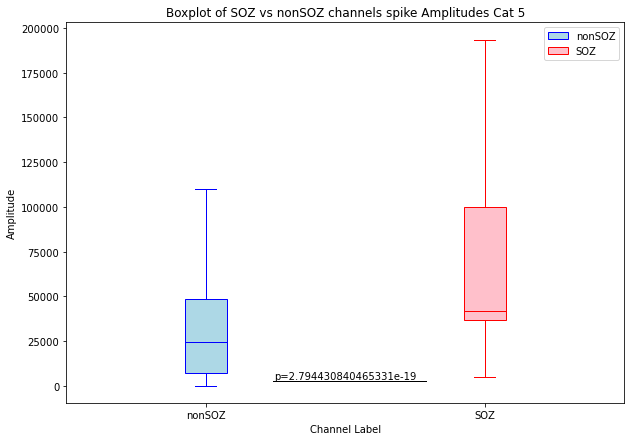

In [51]:
for i in range(len(cats)):
    plot_scatter(cats[i],whichPts[i])
    plot_box_per_pt(cats[i],whichPts[i])

In [52]:
#DELTA BANDPOWER
cats = [cat1,cat2,cat3,cat4,cat5] #list of dictionaries
whichPts = range(5)

cat_pvals = []
cat_SOZ_all = []
cat_nonSOZ_all =[]

for i in range(len(cats)):
    pval, SOZ_all, nonSOZ_all = calc_maxes_and_stats(cats[i], whichPts[i])
    cat_SOZ_all.append(SOZ_all)
    cat_nonSOZ_all.append(nonSOZ_all)
    cat_pvals.append(pval)
    
SOZ_all_mean = [np.mean(x) for x in cat_SOZ_all]
nonSOZ_all_mean = [np.mean(x) for x in cat_nonSOZ_all]

ttest_rel(SOZ_all_mean,nonSOZ_all_mean)
print(ttest_rel(SOZ_all_mean,nonSOZ_all_mean))

Ttest_relResult(statistic=1.8157054313153582, pvalue=0.1435918263598501)


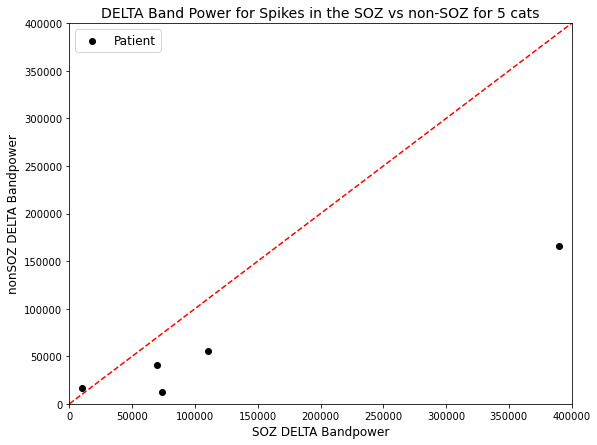

In [53]:
plt.figure(figsize=[9,7])
plt.title('DELTA Band Power for Spikes in the SOZ vs non-SOZ for 5 cats',fontsize=14)
plt.scatter(SOZ_all_mean,nonSOZ_all_mean,color='k',marker='o',label='Patient')
plt.xlabel('SOZ DELTA Bandpower',fontsize=12)
plt.ylabel('nonSOZ DELTA Bandpower',fontsize=12)
y = np.arange(0,400000,1)
x = np.arange(0,400000,1)
plt.ylim([0,400000])
plt.xlim([0,400000])
plt.plot(x,y,linestyle='dashed',color='r')
plt.legend(fontsize=12)
#plt.savefig('fig_2_pts.jpeg',dpi=100)
plt.show()

---

N# --> CAT SOZ ALL
- cat1_n = 1221
- cat2_n = 723
- cat3_n = 291
- cat4_n = 59
- cat5_n = 413

---

feature + distance from SOZ look at mixed effect models to quantify that 

create a heat plot in the form of the grid: 4x8
each point will be on a spectrum from max amplitude....

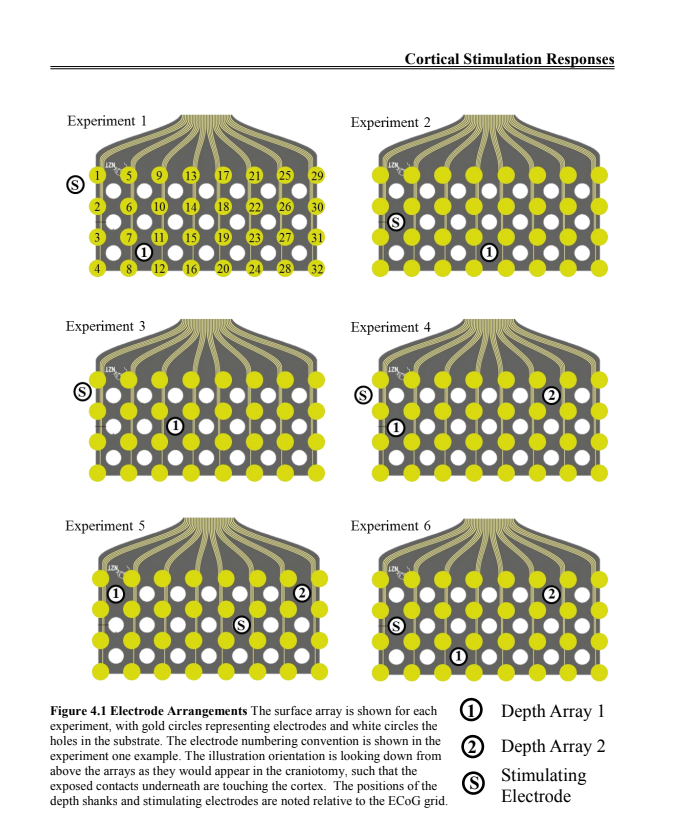

In [54]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

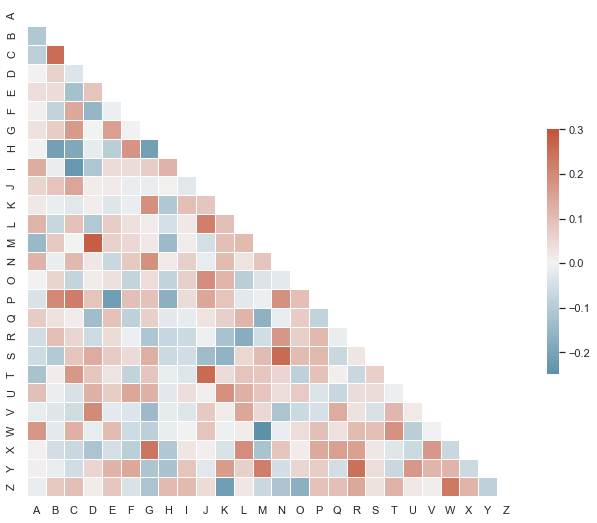

In [55]:
sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [56]:
# CAT 1 - Amplitude matrix reformed into 4x8
def calc_maxes_and_stats(cat_num, WhichPts):
    
    chLabels, values, seqs = load_cat(cat_num);
    
    all_max_vals = maxes_for_all(seqs,values)
    total_maxes = create_uniqch(all_max_vals,chLabels)
    filt_maxes = filter_ch(total_maxes)
    
    SOZ_chlabels = pd.read_csv("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/cat_values/SOZ_cats.csv")
    #hup_soz = prep_chlabels(WhichPts,SOZ_chlabels)
    hup_soz = (SOZ_chlabels.iloc[WhichPts])
    hup_soz = [x for x in hup_soz]
    
    if len(hup_soz) != 0:
        SOZ_find = []
        for i in range(len(hup_soz)):
            find = np.where(hup_soz[i] == chLabels[0][0])[0]
            SOZ_find.append(find)

        if len(SOZ_find) != 0:
            SOZ_find = np.concatenate(SOZ_find) #return python index of SOZ matched

            SOZ_find2 = [x+1 for x in SOZ_find]
        else:
            print('NO MATCHES FOR SOZ LABELS ON THE CHLABELS')
            SOZ_find = []
            SOZ_find2 = []
        
    else: 
        hup_soz = hup_soz
        SOZ_find = []
        SOZ_find2 = []
        
    SOZ_maxes = []
    for soz_ch in SOZ_find:
        SOZ_maxes.append(filt_maxes[soz_ch])

    all_ch = range(len(chLabels[0][0])) #all labels

    nonSOZ_idx = [label for label in all_ch if label not in SOZ_find]
    nonSOZ_maxes = []
    for soz_ch in nonSOZ_idx:
        nonSOZ_maxes.append(filt_maxes[soz_ch])

    if len(SOZ_find) != 0:
        nonSOZ_all = np.concatenate(nonSOZ_maxes)
        nonSOZ_all = [x for x in nonSOZ_all if np.isnan(x) == False]
        SOZ_all = np.concatenate(SOZ_maxes)
        SOZ_all = [x for x in SOZ_all if np.isnan(x) == False]
        stats, pval = ttest_ind(nonSOZ_all, SOZ_all, equal_var = False)

    else:
        nonSOZ_all = np.concatenate(nonSOZ_maxes)
        SOZ_all = SOZ_maxes   
        print('Stats could not be calculated, no SOZ recorded')
        stats, pval = [], []

    return pval, SOZ_all, nonSOZ_all


In [57]:
#CHANGE TO MEAN
def max_per_runtime(seqs,values,I):
    seq_concat = concat_seqs(I,seqs);
    if len(seq_concat) != 0: #skip past the "no spike detected" sequence runtimes
        ch_uniq = np.unique(seq_concat[:,0])
        all_maxvals = []
        for ch in ch_uniq:
            x = np.where(seq_concat[:,0] == ch)[0] #should give you an array with positions where that unique ch was used.
            all_maxes_per_ch = []
            for x in x: #calls on each array in x --> (example. i == [10 34, 70] for when spike channel == 7)
                val = values[I,0][x] - np.mean(values[I,0][x])

                max_val = np.max(np.abs(val)) #FEATURE APPLICATIONS
                
                all_maxes_per_ch.append(max_val)
            all_maxvals.append([ch, all_maxes_per_ch]) 
    else: #the ones with spikes now
        all_maxvals = []
    return all_maxvals #will return all max values in a runtime

In [58]:
chLabels, values, seqs = load_cat(cats[2]);
all_max_vals = maxes_for_all(seqs,values)
total_maxes = create_uniqch(all_max_vals,chLabels)
filt_maxes = filter_ch(total_maxes)

#print(chLabels[0][0])
#hup_soz[i] == chLabels[0][0]

In [59]:
average_max = [np.nanmean(x) for x in filt_maxes]
grid_maxes = average_max[0:32]
#print(grid_maxes)

/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/ipykernel_3265/20461661.py:1: RuntimeWarning: Mean of empty slice
  average_max = [np.nanmean(x) for x in filt_maxes]


In [60]:
grided = np.reshape(grid_maxes, [8,4])
final_grid_arr = np.transpose(grided)
column = ['1','2','3','4','5','6','7','8']

In [61]:
df_grid = pd.DataFrame(final_grid_arr,columns=column)
df_grid

,1,2,3,4,5,6,7,8
0,1254.354343,1891.474085,1131.479962,NaN,NaN,NaN,NaN,NaN
1,2252.210311,2638.672852,1381.026548,NaN,NaN,NaN,NaN,NaN
2,3057.030652,3276.315990,3292.509127,2534.290634,1074.268724,689.415704,NaN,1044.713776
3,3077.162101,3174.829351,3496.539865,NaN,3961.261056,2800.790233,852.550215,NaN


<AxesSubplot:>

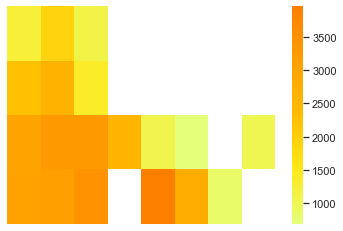

In [62]:
sns.heatmap(df_grid,cmap='Wistia',xticklabels=False, yticklabels=False)


              0
0   1772.191481
1   1597.427286
2    799.580131
3    721.637033
4    698.382667
5    664.827241
6    895.934623
7   1130.652182
8   1111.922110
9    856.844689
10   788.413527
11   743.183685
12   905.691434
13   734.838841
14   702.969222
15   730.856095
16   903.821246
17  1016.237526
18   890.799743
19   893.739449
20   861.888899
21   879.127910
22   862.227622
23   884.067313
24   893.033828
25   909.876610
26   920.099800
27   922.835815
28   968.900563
29   886.722157
30   813.210250
31   832.906685


<AxesSubplot:>

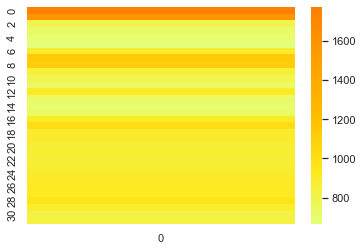

In [63]:
d1 = (average_max[32:])
d1_hor = np.transpose(d1)
depth_strip = pd.DataFrame(d1_hor)
print(depth_strip)
sns.heatmap(depth_strip, cmap = 'Wistia')

---

Heatmap for the Amplitude of the Cats

/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/ipykernel_3265/385969476.py:5: RuntimeWarning: Mean of empty slice
  average_max = [np.nanmean(x) for x in filt_maxes]


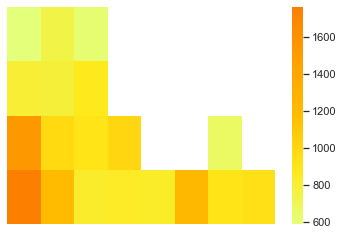

In [64]:
chLabels, values, seqs = load_cat(cats[0]);
all_max_vals = maxes_for_all(seqs,values)
total_maxes = create_uniqch(all_max_vals,chLabels)
filt_maxes = filter_ch(total_maxes)
average_max = [np.nanmean(x) for x in filt_maxes]
grid_maxes = average_max[0:32]
grided = np.reshape(grid_maxes, [8,4])
final_grid_arr = np.transpose(grided)
column = ['1','2','3','4','5','6','7','8']
df_grid = pd.DataFrame(final_grid_arr,columns=column)
sns.heatmap(df_grid,cmap='Wistia',xticklabels=False, yticklabels=False)
plt.show()

/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/ipykernel_3265/187660203.py:5: RuntimeWarning: Mean of empty slice
  average_max = [np.nanmean(x) for x in filt_maxes]


<AxesSubplot:>

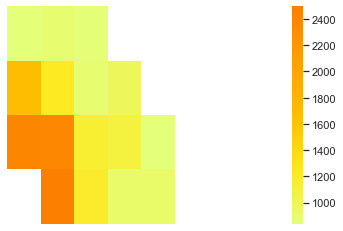

In [65]:
chLabels, values, seqs = load_cat(cats[1]);
all_max_vals = maxes_for_all(seqs,values)
total_maxes = create_uniqch(all_max_vals,chLabels)
filt_maxes = filter_ch(total_maxes)
average_max = [np.nanmean(x) for x in filt_maxes]
grid_maxes = average_max[0:32]
grided = np.reshape(grid_maxes, [8,4])
final_grid_arr = np.transpose(grided)
column = ['1','2','3','4','5','6','7','8']
df_grid = pd.DataFrame(final_grid_arr,columns=column)
sns.heatmap(df_grid,cmap='Wistia',xticklabels=False, yticklabels=False)

/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/ipykernel_3265/511425593.py:5: RuntimeWarning: Mean of empty slice
  average_max = [np.nanmean(x) for x in filt_maxes]


<AxesSubplot:>

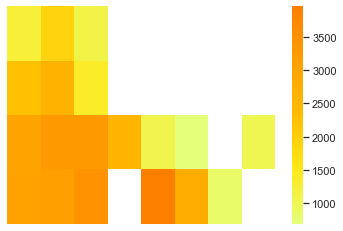

In [66]:
chLabels, values, seqs = load_cat(cats[2]);
all_max_vals = maxes_for_all(seqs,values)
total_maxes = create_uniqch(all_max_vals,chLabels)
filt_maxes = filter_ch(total_maxes)
average_max = [np.nanmean(x) for x in filt_maxes]
grid_maxes = average_max[0:32]
grided = np.reshape(grid_maxes, [8,4])
final_grid_arr = np.transpose(grided)
column = ['1','2','3','4','5','6','7','8']
df_grid = pd.DataFrame(final_grid_arr,columns=column)
sns.heatmap(df_grid,cmap='Wistia',xticklabels=False, yticklabels=False)

/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/ipykernel_3265/893636651.py:5: RuntimeWarning: Mean of empty slice
  average_max = [np.nanmean(x) for x in filt_maxes]


<AxesSubplot:>

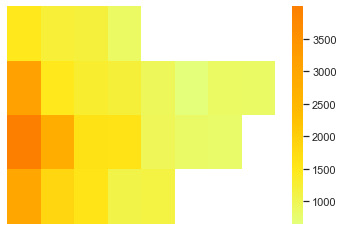

In [67]:
chLabels, values, seqs = load_cat(cats[3]);
all_max_vals = maxes_for_all(seqs,values)
total_maxes = create_uniqch(all_max_vals,chLabels)
filt_maxes = filter_ch(total_maxes)
average_max = [np.nanmean(x) for x in filt_maxes]
grid_maxes = average_max[0:32]
grided = np.reshape(grid_maxes, [8,4])
final_grid_arr = np.transpose(grided)
column = ['1','2','3','4','5','6','7','8']
df_grid = pd.DataFrame(final_grid_arr,columns=column)
sns.heatmap(df_grid,cmap='Wistia',xticklabels=False, yticklabels=False)

/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/ipykernel_3265/424012650.py:5: RuntimeWarning: Mean of empty slice
  average_max = [np.nanmean(x) for x in filt_maxes]


<AxesSubplot:>

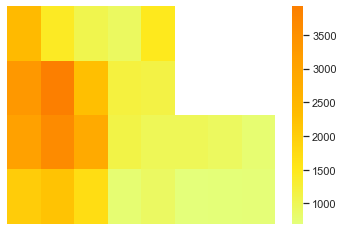

In [68]:
chLabels, values, seqs = load_cat(cats[4]);
all_max_vals = maxes_for_all(seqs,values)
total_maxes = create_uniqch(all_max_vals,chLabels)
filt_maxes = filter_ch(total_maxes)
average_max = [np.nanmean(x) for x in filt_maxes]
grid_maxes = average_max[0:32]
grided = np.reshape(grid_maxes, [8,4])
final_grid_arr = np.transpose(grided)
column = ['1','2','3','4','5','6','7','8']
df_grid = pd.DataFrame(final_grid_arr,columns=column)
sns.heatmap(df_grid,cmap='Wistia',xticklabels=False, yticklabels=False)

---

Cat grids for LineLength

In [69]:
#CHANGE TO LINELENGTH
def max_per_runtime(seqs,values,I):
    seq_concat = concat_seqs(I,seqs);
    if len(seq_concat) != 0: #skip past the "no spike detected" sequence runtimes
        ch_uniq = np.unique(seq_concat[:,0])
        all_maxvals = []
        for ch in ch_uniq:
            x = np.where(seq_concat[:,0] == ch)[0] #should give you an array with positions where that unique ch was used.
            all_maxes_per_ch = []
            for x in x: #calls on each array in x --> (example. i == [10 34, 70] for when spike channel == 7)
                val = values[I,0][x] - np.mean(values[I,0][x])

                max_val = LL(val[700:2000]) #FEATURE APPLICATIONS
                
                all_maxes_per_ch.append(max_val)
            all_maxvals.append([ch, all_maxes_per_ch]) 
    else: #the ones with spikes now
        all_maxvals = []
    return all_maxvals #will return all max values in a runtime

/Users/carlosaguila/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/carlosaguila/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


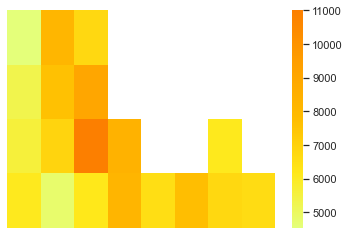

In [70]:
chLabels, values, seqs = load_cat(cats[0]);
all_max_vals = maxes_for_all(seqs,values)
total_maxes = create_uniqch(all_max_vals,chLabels)
filt_maxes = filter_ch(total_maxes)
average_max = [np.median(x) for x in filt_maxes]
grid_maxes = average_max[0:32]
grided = np.reshape(grid_maxes, [8,4])
final_grid_arr = np.transpose(grided)
column = ['1','2','3','4','5','6','7','8']
df_grid = pd.DataFrame(final_grid_arr,columns=column)
sns.heatmap(df_grid,cmap='Wistia',xticklabels=False, yticklabels=False)
plt.show()

<AxesSubplot:>

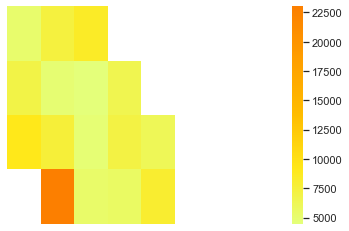

In [71]:
chLabels, values, seqs = load_cat(cats[1]);
all_max_vals = maxes_for_all(seqs,values)
total_maxes = create_uniqch(all_max_vals,chLabels)
filt_maxes = filter_ch(total_maxes)
average_max = [np.median(x) for x in filt_maxes]
grid_maxes = average_max[0:32]
grided = np.reshape(grid_maxes, [8,4])
final_grid_arr = np.transpose(grided)
column = ['1','2','3','4','5','6','7','8']
df_grid = pd.DataFrame(final_grid_arr,columns=column)
sns.heatmap(df_grid,cmap='Wistia',xticklabels=False, yticklabels=False)

<AxesSubplot:>

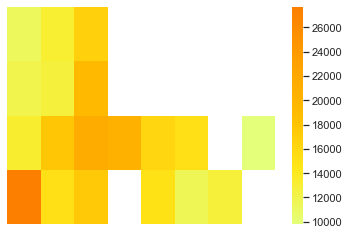

In [72]:
chLabels, values, seqs = load_cat(cats[2]);
all_max_vals = maxes_for_all(seqs,values)
total_maxes = create_uniqch(all_max_vals,chLabels)
filt_maxes = filter_ch(total_maxes)
average_max = [np.median(x) for x in filt_maxes]
grid_maxes = average_max[0:32]
grided = np.reshape(grid_maxes, [8,4])
final_grid_arr = np.transpose(grided)
column = ['1','2','3','4','5','6','7','8']
df_grid = pd.DataFrame(final_grid_arr,columns=column)
sns.heatmap(df_grid,cmap='Wistia',xticklabels=False, yticklabels=False)

<AxesSubplot:>

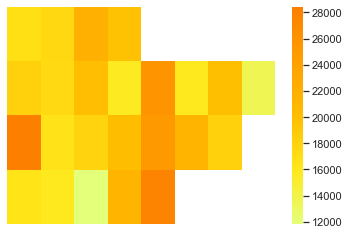

In [73]:
chLabels, values, seqs = load_cat(cats[3]);
all_max_vals = maxes_for_all(seqs,values)
total_maxes = create_uniqch(all_max_vals,chLabels)
filt_maxes = filter_ch(total_maxes)
average_max = [np.median(x) for x in filt_maxes]
grid_maxes = average_max[0:32]
grided = np.reshape(grid_maxes, [8,4])
final_grid_arr = np.transpose(grided)
column = ['1','2','3','4','5','6','7','8']
df_grid = pd.DataFrame(final_grid_arr,columns=column)
sns.heatmap(df_grid,cmap='Wistia',xticklabels=False, yticklabels=False)

<AxesSubplot:>

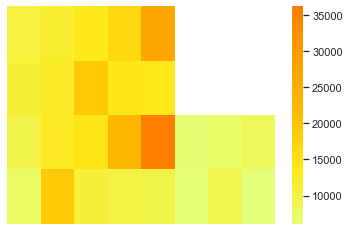

In [74]:
chLabels, values, seqs = load_cat(cats[4]);
all_max_vals = maxes_for_all(seqs,values)
total_maxes = create_uniqch(all_max_vals,chLabels)
filt_maxes = filter_ch(total_maxes)
average_max = [np.median(x) for x in filt_maxes]
grid_maxes = average_max[0:32]
grided = np.reshape(grid_maxes, [8,4])
final_grid_arr = np.transpose(grided)
column = ['1','2','3','4','5','6','7','8']
df_grid = pd.DataFrame(final_grid_arr,columns=column)
sns.heatmap(df_grid,cmap='Wistia',xticklabels=False, yticklabels=False)

---

Bandpower Plots

In [75]:
def max_per_runtime(seqs,values,I):
    seq_concat = concat_seqs(I,seqs);
    if len(seq_concat) != 0: #skip past the "no spike detected" sequence runtimes
        ch_uniq = np.unique(seq_concat[:,0])
        all_maxvals = []
        for ch in ch_uniq:
            x = np.where(seq_concat[:,0] == ch)[0] #should give you an array with positions where that unique ch was used.
            all_maxes_per_ch = []
            for x in x: #calls on each array in x --> (example. i == [10 34, 70] for when spike channel == 7)
                val = values[I,0][x] - np.mean(values[I,0][x])
                max_val = bandpower(val, fs=len(val)-1, fmin = 12, fmax = 30) #FEATURE APPLICATIONS #AMPLITUDE
                #max_val = np.sum(np.absolute(np.ediff1d(val)))
                all_maxes_per_ch.append(max_val)
            all_maxvals.append([ch, all_maxes_per_ch]) 
    else: #the ones with spikes now
        all_maxvals = []
    return all_maxvals #will return all max values in a runtime

/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/ipykernel_3265/3919048576.py:5: RuntimeWarning: Mean of empty slice
  average_max = [np.nanmean(x) for x in filt_maxes]


<AxesSubplot:>

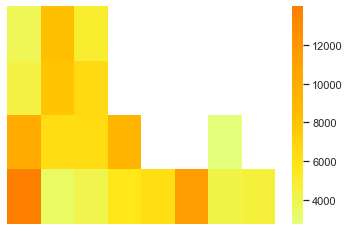

In [76]:
chLabels, values, seqs = load_cat(cats[0]);
all_max_vals = maxes_for_all(seqs,values)
total_maxes = create_uniqch(all_max_vals,chLabels)
filt_maxes = filter_ch(total_maxes)
average_max = [np.nanmean(x) for x in filt_maxes]
grid_maxes = average_max[0:32]
grided = np.reshape(grid_maxes, [8,4])
final_grid_arr = np.transpose(grided)
column = ['1','2','3','4','5','6','7','8']
df_grid = pd.DataFrame(final_grid_arr,columns=column)
sns.heatmap(df_grid,cmap='Wistia',xticklabels=False, yticklabels=False)

/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/ipykernel_3265/187660203.py:5: RuntimeWarning: Mean of empty slice
  average_max = [np.nanmean(x) for x in filt_maxes]


<AxesSubplot:>

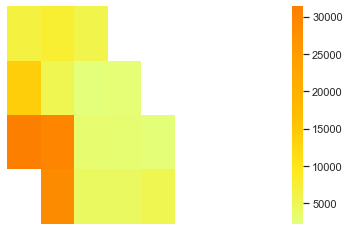

In [77]:
chLabels, values, seqs = load_cat(cats[1]);
all_max_vals = maxes_for_all(seqs,values)
total_maxes = create_uniqch(all_max_vals,chLabels)
filt_maxes = filter_ch(total_maxes)
average_max = [np.nanmean(x) for x in filt_maxes]
grid_maxes = average_max[0:32]
grided = np.reshape(grid_maxes, [8,4])
final_grid_arr = np.transpose(grided)
column = ['1','2','3','4','5','6','7','8']
df_grid = pd.DataFrame(final_grid_arr,columns=column)
sns.heatmap(df_grid,cmap='Wistia',xticklabels=False, yticklabels=False)

/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/ipykernel_3265/511425593.py:5: RuntimeWarning: Mean of empty slice
  average_max = [np.nanmean(x) for x in filt_maxes]


<AxesSubplot:>

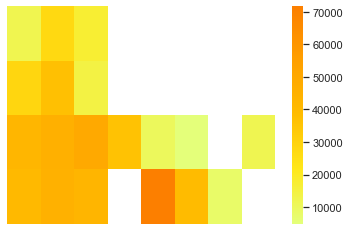

In [78]:
chLabels, values, seqs = load_cat(cats[2]);
all_max_vals = maxes_for_all(seqs,values)
total_maxes = create_uniqch(all_max_vals,chLabels)
filt_maxes = filter_ch(total_maxes)
average_max = [np.nanmean(x) for x in filt_maxes]
grid_maxes = average_max[0:32]
grided = np.reshape(grid_maxes, [8,4])
final_grid_arr = np.transpose(grided)
column = ['1','2','3','4','5','6','7','8']
df_grid = pd.DataFrame(final_grid_arr,columns=column)
sns.heatmap(df_grid,cmap='Wistia',xticklabels=False, yticklabels=False)

/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/ipykernel_3265/893636651.py:5: RuntimeWarning: Mean of empty slice
  average_max = [np.nanmean(x) for x in filt_maxes]


<AxesSubplot:>

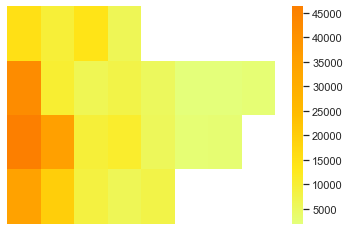

In [79]:
chLabels, values, seqs = load_cat(cats[3]);
all_max_vals = maxes_for_all(seqs,values)
total_maxes = create_uniqch(all_max_vals,chLabels)
filt_maxes = filter_ch(total_maxes)
average_max = [np.nanmean(x) for x in filt_maxes]
grid_maxes = average_max[0:32]
grided = np.reshape(grid_maxes, [8,4])
final_grid_arr = np.transpose(grided)
column = ['1','2','3','4','5','6','7','8']
df_grid = pd.DataFrame(final_grid_arr,columns=column)
sns.heatmap(df_grid,cmap='Wistia',xticklabels=False, yticklabels=False)

/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/ipykernel_3265/424012650.py:5: RuntimeWarning: Mean of empty slice
  average_max = [np.nanmean(x) for x in filt_maxes]


<AxesSubplot:>

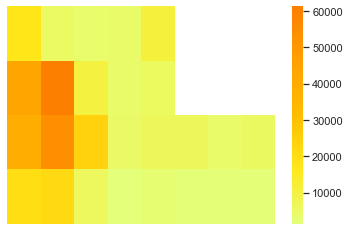

In [80]:
chLabels, values, seqs = load_cat(cats[4]);
all_max_vals = maxes_for_all(seqs,values)
total_maxes = create_uniqch(all_max_vals,chLabels)
filt_maxes = filter_ch(total_maxes)
average_max = [np.nanmean(x) for x in filt_maxes]
grid_maxes = average_max[0:32]
grided = np.reshape(grid_maxes, [8,4])
final_grid_arr = np.transpose(grided)
column = ['1','2','3','4','5','6','7','8']
df_grid = pd.DataFrame(final_grid_arr,columns=column)
sns.heatmap(df_grid,cmap='Wistia',xticklabels=False, yticklabels=False)